## Home Regression

* Student name: **Daniel M. Smith**
* Student pace: **Full Time**
* Scheduled project review date/time: 
* Instructor name: **Abhineet Kulkarni**
* Blog post URL:


## Stakeholder
We are a small company looking for houses to purchase and remodel and either rent or sell in the Kings County, WA housing market. We will gather a list of target houses to inspect as potential investment properties.



In [122]:
import pandas as pd
import numpy as np

data = pd.read_csv('./data/kc_house_data.csv')

**Columns**<br>
id - unique identified for a house<br>
date - house was sold<br>
price - is prediction target<br>
bedrooms- of Bedrooms/House<br>
bathrooms- of bathrooms/bedrooms<br>
sqft_living - footage of the home<br>
sqft_lot - footage of the lot<br>
floors - Total floors (levels) in house<br>
waterfront - House which has a view to a waterfront<br>
view - Has been viewed<br>
condition - How good the condition is ( Overall )<br>
grade - overall grade given to the housing unit, based on King County grading system<br>
sqft_above - square footage of house apart from basement<br>
sqft_basement - square footage of the basement<br>
yr_built - Built Year<br>
yr_renovated - Year when house was renovated<br>
zipcode - zip<br>
lat - Latitude coordinate<br>
long - Longitude coordinate<br>
sqft_living15 - The avg square footage of interior housing living space for the nearest 15 neighbors<br>
sqft_lot15 - The avg square footage of the land lots of the nearest 15 neighbors<br>


In [123]:
data.shape

(21597, 21)

In [124]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,19221.0,7.595859e-03,8.682485e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21534.0,2.338627e-01,7.656862e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [125]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [126]:
data['waterfront'].sort_values(ascending=False)

14760    1.0
11103    1.0
1166     1.0
17753    1.0
300      1.0
        ... 
21578    NaN
21582    NaN
21586    NaN
21587    NaN
21595    NaN
Name: waterfront, Length: 21597, dtype: float64

In [127]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,...,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,1321400060,6/27/2014,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,...,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,0.0,NaN,...,7,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,2414600126,4/15/2015,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,...,7,1050,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113
9,3793500160,3/12/2015,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,...,7,1890,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570


In [128]:
data['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [129]:
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

11% of waterfront is NaN<br>
18% of yr_renovated is NaN<br>
.2% of view is NaN<br>
We will set Nan to 0.0 for Nans

**Handling Nan Values**

In [130]:
data['waterfront'] = data['waterfront'].fillna(0.0)

In [131]:
data['yr_renovated'] = data['yr_renovated'].fillna(0.0)

In [132]:
data['view'] = data['view'].fillna(0.0)

**Rename date column to date last sold**

In [133]:

data['month'] = pd.to_datetime(data['date']).dt.month
data.drop(columns=['date'], inplace=True, axis = 1)

In [134]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  object 
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [135]:
#Covers 70 zipcodes
data.zipcode.value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

Observations:sqft_basement should be converted to a float64 not an object
also has ? which should be set to 0.0


In [136]:
#replacing '?'
data['sqft_basement'] = [0.0 if value == '?' else value for value in data['sqft_basement']]

In [137]:
data.loc[data["sqft_basement"] == '?']


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month


In [138]:
data["sqft_basement"] = pd.to_numeric(data["sqft_basement"])

Price column seems to be the price since last sold. This could be an oout of date column if it has been a long while since last sole.  We should make a 2 features, 1. age of home and 2. how many years since last sold.


Sqft_living15 seems to be an average of the 15 properties around
sqft_lot15 seems to be average of 15 lots around

In [139]:
data.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,...,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509,5
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,...,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200,2
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,...,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007,6
21595,291310100,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,...,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287,1
21596,1523300157,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,3,...,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357,10


In [140]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,...,1788.596842,285.716581,1970.999676,68.758207,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,6.573969
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,...,827.759761,439.819830,29.375234,364.037499,53.513072,0.138552,0.140724,685.230472,27274.441950,3.115061
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,1.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,4.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,6.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,550.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,9.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,12.000000


The data is about houses in zipcodes around Seattle, WA.  
The dependent or response variable is Price and min value is 78000 and max is 7,700,000 and a mean of 540296 and median of 450000. <br>
sq_ft living ranges from 370 to 13540 sf ft.  <br>
bedrooms range from 1 to 33 with a mean of 3.37 and median of 3. <br>
sqft_lot range from 520 to 1651359.0 with mean of 15099 and median of 7618.<br>

**categorical data**<br>
zipcode-70 zipcodes<br>
grade-grade from kings county grading system 3-13<br>
condition-1 to 5 5 is best<br>
view- has been viewed 0-4<br>
waterfront- view of waterfront 0-1 being yes<br>


In [141]:
data['yr_renovated'].value_counts()

0.0       20853
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [142]:
data['view'].value_counts()

0.0    19485
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [143]:
data['waterfront'].value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [145]:
data['age'] = 2015 - data['yr_built']

In [146]:
data['age']

0        60
1        64
2        82
3        50
4        28
         ..
21592     6
21593     1
21594     6
21595    11
21596     7
Name: age, Length: 21597, dtype: int64

In [147]:
data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,10,60
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,64
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,12,50
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2,28
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930,5,14
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,0.0,1995,0.0,98003,47.3097,-122.327,2238,6819,6,20
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711,1,52
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,730.0,1960,0.0,98146,47.5123,-122.337,1780,8113,4,55
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,0.0,2003,0.0,98038,47.3684,-122.031,2390,7570,3,12


In [148]:
data['yrsince_reno'] = data['age']

In [149]:
data['yrsince_reno'] = [(2015 - val)  if (val !=0.0) else None for val in data['yr_renovated'] ]
#expression1 if condition else expression2 for item in iterable
data['yrsince_reno'] = data['yrsince_reno'].fillna(data['age'])

In [150]:
data.head(10)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,age,yrsince_reno
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,1955,0.0,98178,47.5112,-122.257,1340,5650,10,60,60.0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,12,64,24.0
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2,82,82.0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,1965,0.0,98136,47.5208,-122.393,1360,5000,12,50,50.0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,28,28.0
5,7237550310,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,...,2001,0.0,98053,47.6561,-122.005,4760,101930,5,14,14.0
6,1321400060,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,...,1995,0.0,98003,47.3097,-122.327,2238,6819,6,20,20.0
7,2008000270,291850.0,3,1.50,1060,9711,1.0,0.0,0.0,3,...,1963,0.0,98198,47.4095,-122.315,1650,9711,1,52,52.0
8,2414600126,229500.0,3,1.00,1780,7470,1.0,0.0,0.0,3,...,1960,0.0,98146,47.5123,-122.337,1780,8113,4,55,55.0
9,3793500160,323000.0,3,2.50,1890,6560,2.0,0.0,0.0,3,...,2003,0.0,98038,47.3684,-122.031,2390,7570,3,12,12.0


In [151]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,6.760198e-03,8.194394e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.331805e-01,7.646726e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  float64
 8   view           21597 non-null  float64
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [153]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'age', 'yrsince_reno'],
      dtype='object')

In [154]:
#rearrange Columns
data = data[['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'yr_built','age','condition', 'grade', 'waterfront',
        'yr_renovated','yrsince_reno', 'sqft_above', 'sqft_basement',  'view',  'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15' ]]

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   yr_built       21597 non-null  int64  
 8   age            21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  waterfront     21597 non-null  float64
 12  yr_renovated   21597 non-null  float64
 13  yrsince_reno   21597 non-null  float64
 14  sqft_above     21597 non-null  int64  
 15  sqft_basement  21597 non-null  float64
 16  view           21597 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

In [156]:
data

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,age,condition,...,yr_renovated,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,1955,60,3,...,0.0,60.0,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,1951,64,3,...,1991.0,24.0,2170,400.0,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,1933,82,3,...,0.0,82.0,770,0.0,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,1965,50,5,...,0.0,50.0,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,1987,28,3,...,0.0,28.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,2009,6,3,...,0.0,6.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,2014,1,3,...,0.0,1.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,2009,6,3,...,0.0,6.0,1020,0.0,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,2004,11,3,...,0.0,11.0,1600,0.0,0.0,98027,47.5345,-122.069,1410,1287


In [157]:
data.to_csv('./data/kc_house_data_tidy.csv',encoding='utf-8')

---
---
---

## EDA of data

In [158]:
#load Tidy Data
hddf = pd.read_csv('./data/kc_house_data_tidy.csv')

In [159]:
hddf.drop(columns='Unnamed: 0',inplace=True)

In [160]:

hddf.drop(columns=['yr_built', 'yr_renovated'],inplace=True)

In [161]:
hddf


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade,waterfront,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,60,3,7,0.0,60.0,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,64,3,7,0.0,24.0,2170,400.0,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,82,3,6,0.0,82.0,770,0.0,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,50,5,7,0.0,50.0,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,28,3,8,0.0,28.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,6,3,8,0.0,6.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,1,3,8,0.0,1.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,6,3,7,0.0,6.0,1020,0.0,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,400000.0,3,2.50,1600,2388,2.0,11,3,8,0.0,11.0,1600,0.0,0.0,98027,47.5345,-122.069,1410,1287


In [162]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline
import seaborn as sns


In [163]:
for col in hddf:
    print(col.upper())
    print(hddf[col].value_counts())
    print('################')

ID
795000620     3
1825069031    2
2019200220    2
7129304540    2
1781500435    2
             ..
7812801125    1
4364700875    1
3021059276    1
880000205     1
1777500160    1
Name: id, Length: 21420, dtype: int64
################
PRICE
350000.0    172
450000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
870515.0      1
336950.0      1
386100.0      1
176250.0      1
884744.0      1
Name: price, Length: 3622, dtype: int64
################
BEDROOMS
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
################
BATHROOMS
2.50    5377
1.00    3851
1.75    3048
2.25    2047
2.00    1930
1.50    1445
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      71
4.75      23
5.00      21
5.25      13
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.25       2
6.75 

<AxesSubplot:xlabel='long', ylabel='lat'>

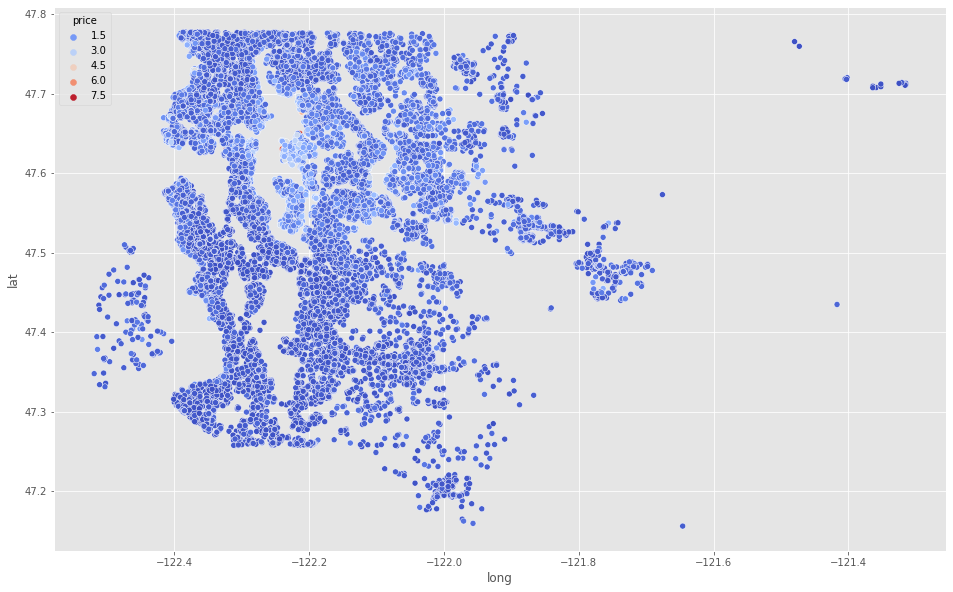

In [164]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='long', y='lat', data=hddf, hue='price', palette='coolwarm')

In [165]:
hddf.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'age', 'condition', 'grade', 'waterfront', 'yrsince_reno',
       'sqft_above', 'sqft_basement', 'view', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [166]:
#define feature pertinent to model
feats_df = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'age', 'condition', 'grade', 'waterfront', 'yrsince_reno',
       'sqft_above', 'sqft_basement', 'view', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

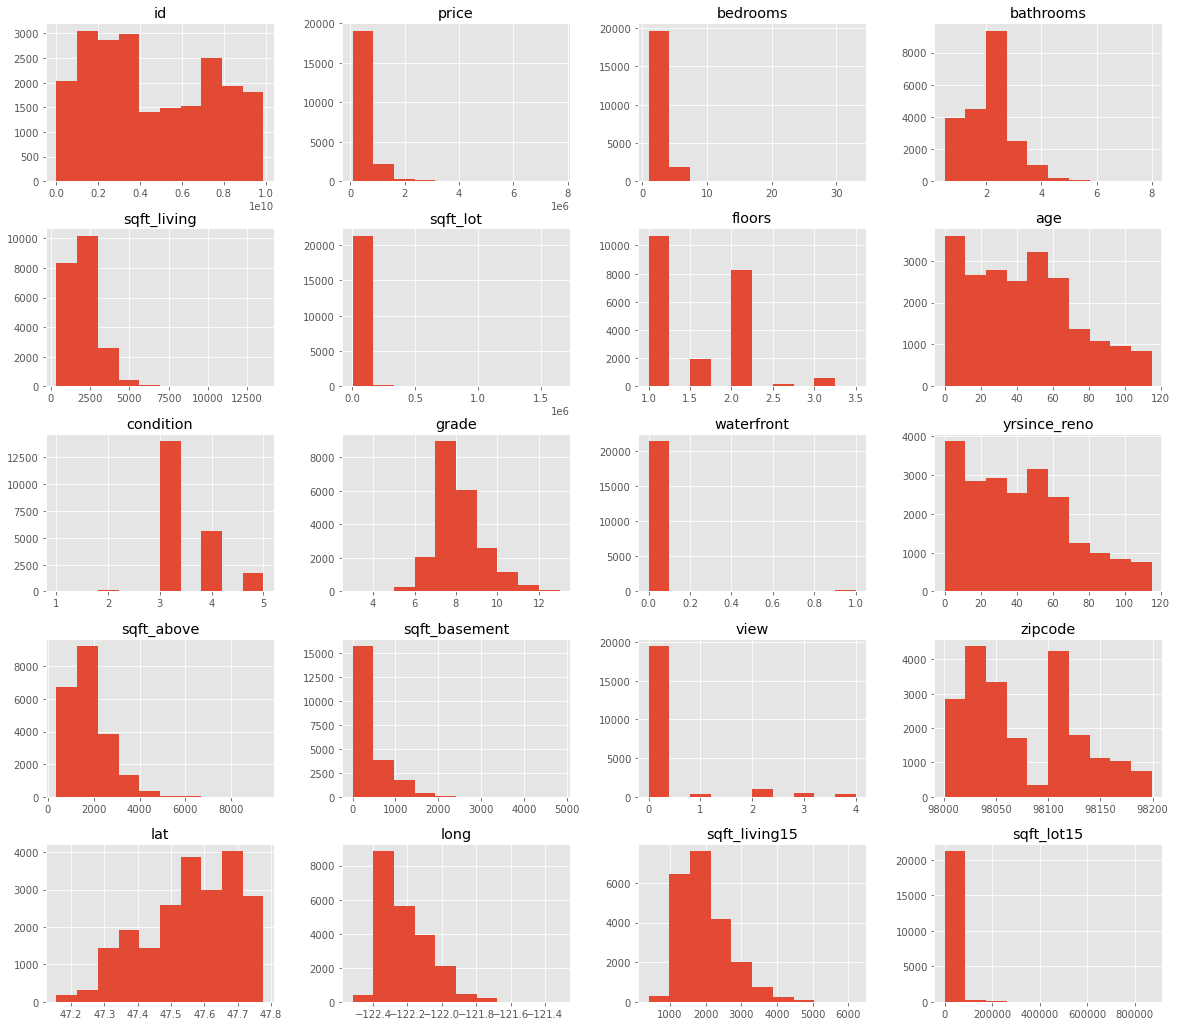

In [167]:
hddf.hist(figsize = (20,18));

Price looks to be right skewed.  We will look for linearity between different pairs of data.
## Check for Linearity

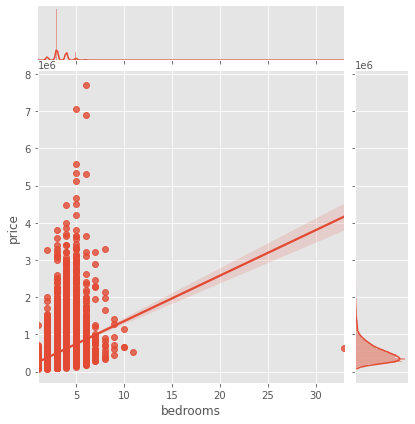

In [169]:
sns.jointplot(x='bedrooms',y='price', data=hddf, kind='reg');

**Observation:** A Big outlier of 30+ bedrooms. Note: we should remove the outlier. 

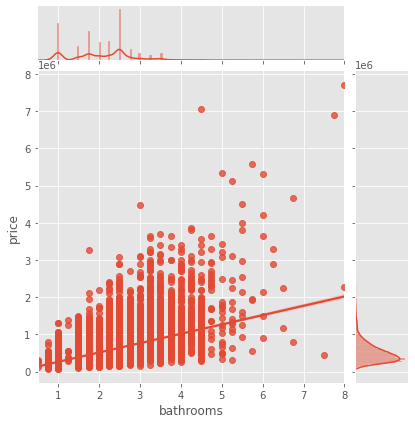

In [170]:
sns.jointplot(x='bathrooms',y='price', data=hddf, kind='reg');

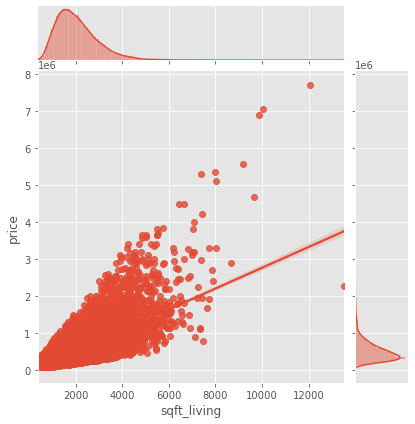

In [171]:
sns.jointplot(x='sqft_living',y='price', data=hddf, kind='reg');

Is linear? not truly but somewhat

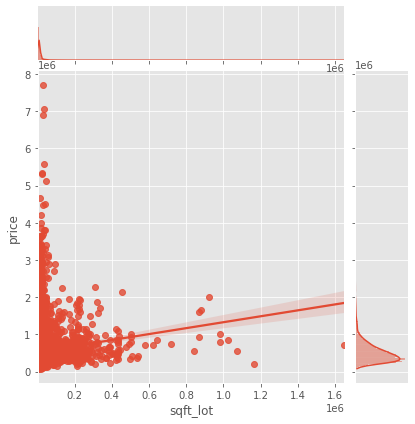

In [172]:
sns.jointplot(x='sqft_lot',y='price', data=hddf, kind='reg');

not linear

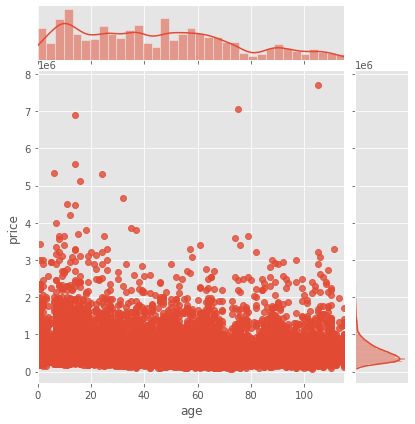

In [173]:
sns.jointplot(x='age',y='price', data=hddf, kind='reg');

not linear

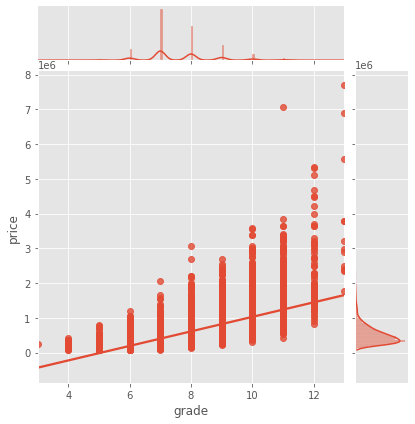

In [174]:
sns.jointplot(x='grade',y='price', data=hddf, kind='reg');

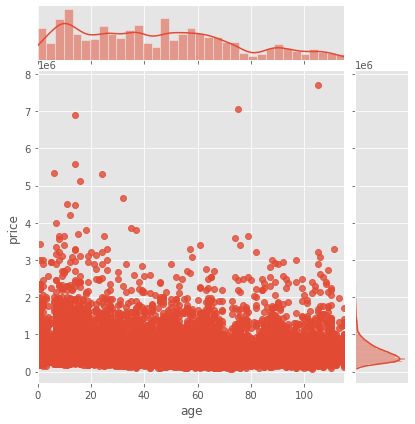

In [175]:
sns.jointplot(x='age',y='price', data=hddf, kind='reg');

## Check for multicolinearity in features

In [176]:
corr = hddf[feats_df].corr()
corr

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade,waterfront,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.514508,0.578212,0.032471,0.177944,-0.155670,0.026496,0.356563,-0.002127,-0.164392,0.479386,0.297229,0.078354,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.514508,1.000000,0.755758,0.088373,0.502582,-0.507173,-0.126479,0.665838,0.063629,-0.532389,0.686668,0.278485,0.186016,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,0.578212,0.755758,1.000000,0.173453,0.353953,-0.318152,-0.059445,0.762779,0.104637,-0.339146,0.876448,0.428660,0.281715,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,0.032471,0.088373,0.173453,1.000000,-0.004814,-0.052946,-0.008830,0.114731,0.021459,-0.051870,0.184139,0.015031,0.075054,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.177944,0.502582,0.353953,-0.004814,1.000000,-0.489193,-0.264075,0.458794,0.020797,-0.500721,0.523989,-0.241866,0.028414,-0.059541,0.049239,0.125943,0.280102,-0.010722
age,-0.155670,-0.507173,-0.318152,-0.052946,-0.489193,1.000000,0.361592,-0.447865,0.024487,0.926406,-0.424037,0.130085,0.054452,0.347210,0.148370,-0.409993,-0.326377,-0.070777
condition,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.361592,1.000000,-0.146896,0.016648,0.390264,-0.158904,0.168482,0.045622,0.002888,-0.015102,-0.105877,-0.093072,-0.003126
grade,0.356563,0.665838,0.762779,0.114731,0.458794,-0.447865,-0.146896,1.000000,0.082818,-0.459334,0.756073,0.165843,0.249082,-0.185771,0.113575,0.200341,0.713867,0.120981
waterfront,-0.002127,0.063629,0.104637,0.021459,0.020797,0.024487,0.016648,0.082818,1.000000,0.006891,0.071778,0.083050,0.380543,0.028923,-0.012157,-0.037628,0.083823,0.030658
yrsince_reno,-0.164392,-0.532389,-0.339146,-0.051870,-0.500721,0.926406,0.390264,-0.459334,0.006891,1.000000,-0.433434,0.105181,0.026631,0.323968,0.137445,-0.386314,-0.325529,-0.069415


In [177]:
#looking for pairwise correlations over .65 is a sign of multicolinearity

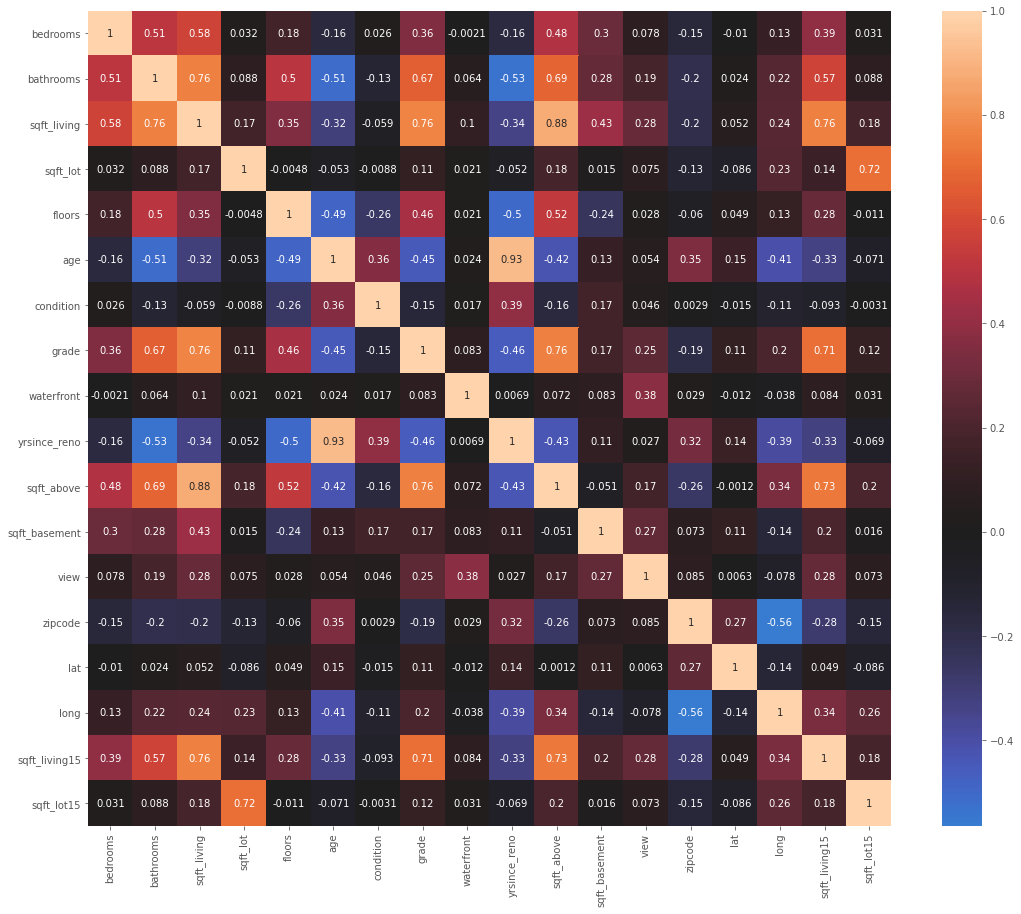

In [178]:
plt.figure(figsize=(18,15))
sns.heatmap(corr, center=0, annot=True);

# Model Building 
## Baseline model

In [179]:
hddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   age            21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  waterfront     21597 non-null  float64
 11  yrsince_reno   21597 non-null  float64
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  view           21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

In [180]:
from statsmodels.formula.api import ols

In [181]:
outcome = 'price'
predictors_df = hddf.drop(['id', 'price', ], axis = 1)
predictor_variables = "+".join(predictors_df.columns)
formula = outcome + '~' + predictor_variables

In [182]:
predictor_variables

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+age+condition+grade+waterfront+yrsince_reno+sqft_above+sqft_basement+view+zipcode+lat+long+sqft_living15+sqft_lot15'

In [183]:
formula

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+age+condition+grade+waterfront+yrsince_reno+sqft_above+sqft_basement+view+zipcode+lat+long+sqft_living15+sqft_lot15'

In [184]:
baseline_model = ols(formula = formula, data = hddf).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.700
Method:                 Least Squares   F-statistic:                     2797.
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        00:52:40   Log-Likelihood:            -2.9439e+05
No. Observations:               21597   AIC:                         5.888e+05
Df Residuals:                   21578   BIC:                         5.890e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.329e+06   2.88e+06      0.461      0.645   -4.33e+06    6.98e+06
bedrooms      -3.592e+04   1901.055    -18.897      0.000   -3.97e+04   -3.22e+04
bathrooms      4.167e+04   3269.532     12.744      0.000    3.53e+04    4.81e+04
sqft_living     102.6395     18.081      5.677      0.000      67.200     138.079
sqft_lot          0.1287      0.048      2.684      0.007       0.035       0.223
floors         6726.8993   3605.553      1.866      0.062    -340.250    1.38e+04
age            3312.9565    127.530     25.978      0.000    3062.987    3562.926
condition      2.678e+04   2353.707     11.380      0.000    2.22e+04    3.14e+04
grade          9.676e+04   2162.791     44.738      0.000    9.25e+04    1.01e+05
waterfront      6.21e+05   1.81e+04     34.256      0.000    5.85e+05    6.56e+05
yrsince_reno   -676.0185    131.088     -5.157      0.000    -932.962    -419.075
sqft_above       78.4711     18.072      4.342      0.000      43.048     113.894
sqft_basement    47.7765     17.911      2.667      0.008      12.670      82.883
view           5.345e+04   2122.012     25.188      0.000    4.93e+04    5.76e+04
zipcode        -584.6090     32.998    -17.716      0.000    -649.288    -519.930
lat            6.008e+05   1.07e+04     55.922      0.000     5.8e+05    6.22e+05
long          -2.179e+05   1.32e+04    -16.553      0.000   -2.44e+05   -1.92e+05
sqft_living15    21.5861      3.453      6.252      0.000      14.818      28.354
sqft_lot15       -0.3869      0.073     -5.273      0.000      -0.531      -0.243
==============================================================================
Omnibus:                    18331.569   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1823772.872
Skew:                           3.561   Prob(JB):                         0.00
Kurtosis:                      47.452   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Conclusions from baseline model:

1. Drop **id** as its not a relevant feature (even though it has a good p-value doesn't really tell us anything)
2. **Bedrooms** has a negative coefficient -> As bedrooms increase, price decreases. 
3. Price per sqft is about $102
4. **Yr_Built** has a negative coefficient
5. **Zipcode** has a negative coefficent. need to look into how to get location data in the model
6. **sqft_lot15** has a neg coef  
7. **yrsince_reno**
8. **floors** .062 not relevant

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [186]:
X = predictors_df
y = hddf['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [187]:
baseline_linreg = LinearRegression()
baseline_linreg.fit(X_train, y_train)

LinearRegression()

In [188]:
y_pred = baseline_linreg.predict(X_test)

In [189]:
residuals = y_pred - y_test

In [190]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'age',
       'condition', 'grade', 'waterfront', 'yrsince_reno', 'sqft_above',
       'sqft_basement', 'view', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [191]:
baseline_linreg.coef_

array([-3.89688786e+04,  4.15896223e+04,  1.24070917e+02,  1.69028472e-01,
        1.08304695e+04,  3.23425813e+03,  2.51784144e+04,  9.82927953e+04,
        6.01867568e+05, -5.70846507e+02,  5.19520944e+01,  2.98032950e+01,
        5.42902143e+04, -5.93251557e+02,  5.98034512e+05, -2.08357883e+05,
        2.43185044e+01, -4.40182678e-01])

In [192]:
from sklearn.metrics import mean_squared_error

In [193]:
mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 199867.60910058717
Test RMSE: 205457.75418752249


In [194]:
import statsmodels.api as sm
import scipy.stats as stats

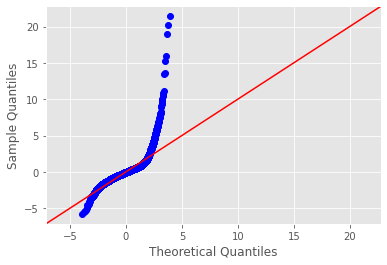

In [195]:
fig = sm.graphics.qqplot(baseline_model.resid, dist=stats.norm, line='45', fit=True)

## Model 2 -  Dealing with outliers

In [196]:
hddf.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
age,21597.0,4.400032e+01,2.937523e+01,0.000000e+00,1.800000e+01,4.000000e+01,6.400000e+01,1.150000e+02
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,21597.0,7.657915e+00,1.173200e+00,3.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.300000e+01


In [296]:
hddf_no_out = hddf[hddf.bathrooms >= 1]

In [ ]:
#removed 75 rows based off bathroom outliers

In [199]:
#Clean outliers where z score is > 3
#not cleaning zscore outliers where negative as smaller is good.

In [299]:
z = stats.zscore(hddf_no_out)
print(z)

[[ 0.88519717 -0.86846203 -0.4100402  ... -0.30658272 -0.94639815
  -0.26006107]
 [ 0.63667269 -0.00860214 -0.4100402  ... -0.74828667 -0.43556223
  -0.18715978]
 [ 0.36472761 -0.98243903 -1.49404526 ... -0.13560055  1.0677549
  -0.17165589]
 ...
 [-1.50076899 -0.49280037 -0.4100402  ... -0.94064161 -0.66908723
  -0.41183796]
 [ 0.70129178 -0.38399178  0.67396486 ... -1.05462973 -0.23122787
  -0.20325011]
 [-1.49093154 -0.38399178 -0.4100402  ...  1.03277764 -0.84423097
  -0.41997476]]


In [300]:
threshold = 3.0
print(np.where(z > threshold))

(array([    5,     5,     5, ..., 21501, 21501, 21511], dtype=int64), array([ 3,  4, 18, ..., 13, 18, 12], dtype=int64))


In [301]:
hddf_no_out = hddf_no_out[(z < 3).all(axis=1)]

In [303]:
len(hddf_no_out)

19414

In [304]:
1000/22000

0.045454545454545456

In [305]:
hddf_no_out.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,19414.0,4.639691e+09,2.866897e+09,1.000102e+06,2.202500e+09,4.003000e+09,7.345528e+09,9.900000e+09
price,19414.0,4.855176e+05,2.355341e+05,7.800000e+04,3.149500e+05,4.350000e+05,6.011130e+05,1.640000e+06
bedrooms,19414.0,3.326362e+00,8.507958e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
bathrooms,19414.0,2.043989e+00,6.890579e-01,1.000000e+00,1.500000e+00,2.000000e+00,2.500000e+00,4.250000e+00
sqft_living,19414.0,1.954245e+03,7.392536e+02,3.900000e+02,1.400000e+03,1.840000e+03,2.413750e+03,4.750000e+03
sqft_lot,19414.0,9.838963e+03,1.148257e+04,5.200000e+02,5.000000e+03,7.350000e+03,9.898000e+03,1.372140e+05
floors,19414.0,1.481482e+00,5.384602e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
age,19414.0,4.443000e+01,2.946139e+01,0.000000e+00,1.900000e+01,4.100000e+01,6.400000e+01,1.150000e+02
condition,19414.0,3.411456e+00,6.494966e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
grade,19414.0,7.533378e+00,1.026960e+00,4.000000e+00,7.000000e+00,7.000000e+00,8.000000e+00,1.100000e+01


In [306]:
hddf_no_out

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade,waterfront,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,60,3,7,0.0,60.0,1180,0.0,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,64,3,7,0.0,24.0,2170,400.0,0.0,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,82,3,6,0.0,82.0,770,0.0,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,50,5,7,0.0,50.0,1050,910.0,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,28,3,8,0.0,28.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,7936000429,1010000.0,4,3.50,3510,7200,2.0,6,3,9,0.0,6.0,2600,910.0,0.0,98136,47.5537,-122.398,2050,6200
21591,2997800021,475000.0,3,2.50,1310,1294,2.0,7,3,8,0.0,7.0,1180,130.0,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,360000.0,3,2.50,1530,1131,3.0,6,3,8,0.0,6.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,1,3,8,0.0,1.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200


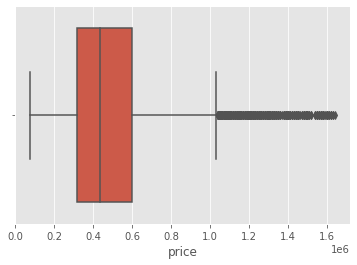

In [307]:
sns.boxplot(x=hddf_no_out.price);

## Model 2


In [308]:
hddf_no_out.shape

(19414, 20)

In [309]:
outcome = 'price'
predictors = hddf_no_out.drop(columns = ['price', 'id'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [310]:
model_2 = ols(formula = formula, data = hddf_no_out).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     2418.
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        01:12:34   Log-Likelihood:            -2.5665e+05
No. Observations:               19414   AIC:                         5.133e+05
Df Residuals:                   19396   BIC:                         5.135e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5.481e+06   2.04e+06     -2.686      0.007   -9.48e+06   -1.48e+06
bedrooms      -1.502e+04   1471.474    -10.210      0.000   -1.79e+04   -1.21e+04
bathrooms      2.933e+04   2435.132     12.044      0.000    2.46e+04    3.41e+04
sqft_living      80.4875     13.879      5.799      0.000      53.284     107.691
sqft_lot          0.2857      0.145      1.972      0.049       0.002       0.570
floors         2.849e+04   2619.453     10.875      0.000    2.34e+04    3.36e+04
age            2767.6561     93.271     29.673      0.000    2584.836    2950.476
condition      2.762e+04   1650.088     16.738      0.000    2.44e+04    3.09e+04
grade          8.601e+04   1575.778     54.581      0.000    8.29e+04    8.91e+04
waterfront     1.274e-06   4.74e-07      2.686      0.007    3.44e-07     2.2e-06
yrsince_reno   -592.2153     95.526     -6.200      0.000    -779.454    -404.977
sqft_above       17.7745     13.852      1.283      0.199      -9.377      44.926
sqft_basement    13.1119     13.748      0.954      0.340     -13.835      40.058
view            4.03e+04   2445.244     16.480      0.000    3.55e+04    4.51e+04
zipcode        -358.4750     23.348    -15.354      0.000    -404.238    -312.712
lat            5.692e+05   7468.260     76.221      0.000    5.55e+05    5.84e+05
long          -1.054e+05   1.05e+04    -10.071      0.000   -1.26e+05   -8.49e+04
sqft_living15    46.0971      2.721     16.943      0.000      40.764      51.430
sqft_lot15       -1.3384      0.188     -7.116      0.000      -1.707      -0.970
==============================================================================
Omnibus:                     5219.322   Durbin-Watson:                   1.966
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23220.927
Skew:                           1.251   Prob(JB):                         0.00
Kurtosis:                       7.738   Cond. No.                     8.21e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.83e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Conclusions from model 2:

1. Sqft_Basement no longer relevant feature. Will need to drop it in the next model
2. sqft_lot no longer relevant feature. Will need to drop it in the next model

In [311]:
X = hddf_no_out.drop("price", axis = 1)
y = hddf_no_out['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [312]:
print(len(X_train))

print(len(X_test))

14560
4854


In [313]:
model2_linreg = LinearRegression()
model2_linreg.fit(X_train, y_train)
y_pred = model2_linreg.predict(X_test)
residuals = y_pred - y_test

In [314]:
model2_linreg.coef_

array([-6.89271342e-07, -1.74498048e+04,  3.02656086e+04,  7.93955619e+01,
        1.76508732e-01,  2.91479422e+04,  2.89442033e+03,  2.75479680e+04,
        8.41020068e+04, -1.07320375e-10, -7.04903888e+02,  2.06022101e+01,
        1.70311848e+01,  4.02302697e+04, -3.57213641e+02,  5.62383277e+05,
       -9.71159609e+04,  4.63882676e+01, -1.25659855e+00])

In [315]:
mse_train = mean_squared_error(y_train, model2_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 133527.5873672322
Test RMSE: 132892.7754935861


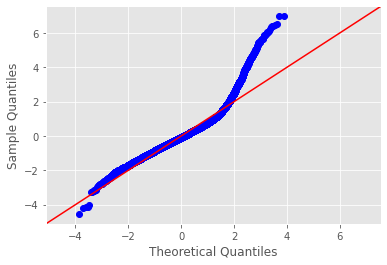

In [316]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line='45', fit=True)

## Model 3 Fix Cat Features

In [317]:
hddf_no_out.condition.unique()

array([3, 5, 4, 1, 2], dtype=int64)

In [318]:
hddf_no_out.grade.unique()

array([ 7,  6,  8,  5,  9, 10, 11,  4], dtype=int64)

In [319]:
hddf_no_out.view.unique()

array([0., 2., 1.])

In [320]:
condition_dummies = pd.get_dummies(hddf_no_out['condition'], prefix = 'cond', drop_first= True)

In [321]:
grade_dummies = pd.get_dummies(hddf_no_out['grade'], prefix = 'grade', drop_first= True)

In [322]:
view_dummies = pd.get_dummies(hddf_no_out['view'], prefix = 'view', drop_first= True)

In [323]:
grade_dummies.shape

(19414, 7)

In [324]:
view_dummies.shape

(19414, 2)

In [368]:
hddf_no_out_dum = pd.concat([hddf_no_out,condition_dummies, grade_dummies, view_dummies], axis =1 )

In [369]:
hddf_no_out_dum.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,condition,grade,...,cond_5,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,view_1.0,view_2.0
0,7129300520,221900.0,3,1.00,1180,5650,1.0,60,3,7,...,0,0,0,1,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,64,3,7,...,0,0,0,1,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,82,3,6,...,0,0,1,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,50,5,7,...,1,0,0,1,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,28,3,8,...,0,0,0,0,1,0,0,0,0,0


In [370]:
hddf_no_out_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19414 entries, 0 to 21595
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19414 non-null  int64  
 1   price          19414 non-null  float64
 2   bedrooms       19414 non-null  int64  
 3   bathrooms      19414 non-null  float64
 4   sqft_living    19414 non-null  int64  
 5   sqft_lot       19414 non-null  int64  
 6   floors         19414 non-null  float64
 7   age            19414 non-null  int64  
 8   condition      19414 non-null  int64  
 9   grade          19414 non-null  int64  
 10  waterfront     19414 non-null  float64
 11  yrsince_reno   19414 non-null  float64
 12  sqft_above     19414 non-null  int64  
 13  sqft_basement  19414 non-null  float64
 14  view           19414 non-null  float64
 15  zipcode        19414 non-null  int64  
 16  lat            19414 non-null  float64
 17  long           19414 non-null  float64
 18  sqft_l

In [371]:
hddf_no_out_dum.drop(columns=['id', 'condition', 'view', 'grade', 'sqft_basement',], inplace = True)

In [372]:
#rename columns
hddf_no_out_dum.columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'age', 'waterfront', 'yrsince_reno', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'cond_2','cond_3', 'cond_4', 'cond_5','grade_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'view_1', 'view_2']

In [373]:
hddf_no_out_dum.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'age', 'waterfront', 'yrsince_reno', 'sqft_above', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15', 'cond_2', 'cond_3', 'cond_4',
       'cond_5', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'view_1', 'view_2'],
      dtype='object')

In [374]:
outcome = 'price'
predictors = hddf_no_out_dum.drop(columns = ['price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [375]:
model_3 = ols(formula = formula, data = hddf_no_out_dum).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     1634.
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        01:21:42   Log-Likelihood:            -2.5642e+05
No. Observations:               19414   AIC:                         5.129e+05
Df Residuals:                   19387   BIC:                         5.131e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.901e+06   2.03e+06     -1.428      0.153   -6.88e+06    1.08e+06
bedrooms      -1.071e+04   1474.692     -7.261      0.000   -1.36e+04   -7816.922
bathrooms      3.228e+04   2425.129     13.312      0.000    2.75e+04     3.7e+04
sqft_living      92.8872      3.457     26.868      0.000      86.111      99.664
sqft_lot          0.3109      0.143      2.167      0.030       0.030       0.592
floors         2.951e+04   2615.585     11.283      0.000    2.44e+04    3.46e+04
age            2710.0673     92.292     29.364      0.000    2529.167    2890.968
waterfront     5.692e-05   8.88e-06      6.408      0.000    3.95e-05    7.43e-05
yrsince_reno   -678.5692     94.844     -7.155      0.000    -864.471    -492.667
sqft_above       -5.0194      3.394     -1.479      0.139     -11.672       1.633
zipcode        -387.4582     23.258    -16.659      0.000    -433.047    -341.870
lat            5.775e+05   7404.747     77.985      0.000    5.63e+05    5.92e+05
long          -1.089e+05   1.04e+04    -10.494      0.000   -1.29e+05   -8.85e+04
sqft_living15    41.2736      2.708     15.244      0.000      35.967      46.581
sqft_lot15       -1.4249      0.186     -7.652      0.000      -1.790      -1.060
cond_2         1.968e+04   2.87e+04      0.687      0.492   -3.65e+04    7.59e+04
cond_3          3.77e+04   2.66e+04      1.415      0.157   -1.45e+04    8.99e+04
cond_4         6.598e+04   2.67e+04      2.476      0.013    1.37e+04    1.18e+05
cond_5         9.943e+04   2.68e+04      3.710      0.000    4.69e+04    1.52e+05
grade_5        1.646e+04   3.65e+04      0.451      0.652   -5.51e+04     8.8e+04
grade_6        5.032e+04   3.55e+04      1.418      0.156   -1.93e+04     1.2e+05
grade_7        1.029e+05   3.55e+04      2.902      0.004    3.34e+04    1.72e+05
grade_8        1.797e+05   3.56e+04      5.052      0.000     1.1e+05    2.49e+05
grade_9        3.092e+05   3.58e+04      8.639      0.000    2.39e+05    3.79e+05
grade_10       4.081e+05   3.61e+04     11.296      0.000    3.37e+05    4.79e+05
grade_11       5.037e+05   3.78e+04     13.311      0.000     4.3e+05    5.78e+05
view_1         9.295e+04   7973.057     11.658      0.000    7.73e+04    1.09e+05
view_2         7.299e+04   4986.210     14.639      0.000    6.32e+04    8.28e+04
==============================================================================
Omnibus:                     4996.600   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            22129.820
Skew:                           1.196   Prob(JB):                         0.00
Kurtosis:                       7.651   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of th

**Observations**

In [376]:
X = hddf_no_out_dum.drop("price", axis = 1)
y = hddf_no_out_dum['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [377]:
print(len(X_train))

print(len(X_test))

14560
4854


In [378]:
model3_linreg = LinearRegression()
model3_linreg.fit(X_train, y_train)
y_pred = model3_linreg.predict(X_test)
residuals = y_pred - y_test

In [379]:
model3_linreg.coef_

array([-1.32970488e+04,  3.32426783e+04,  9.53766766e+01,  2.24052922e-01,
        3.01113268e+04,  2.82601481e+03, -6.81270649e-08, -7.74770832e+02,
       -5.50999336e+00, -3.87643315e+02,  5.70464668e+05, -1.02084758e+05,
        4.12752935e+01, -1.32573963e+00,  1.64633212e+02,  1.78006263e+04,
        4.61030079e+04,  7.96383084e+04,  2.13421932e+04,  5.29749206e+04,
        1.06597199e+05,  1.81228018e+05,  3.10594835e+05,  4.01056856e+05,
        4.96798512e+05,  9.34346530e+04,  7.27075858e+04])

In [380]:
mse_train = mean_squared_error(y_train, model3_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 132072.20998121792
Test RMSE: 131256.31064387024


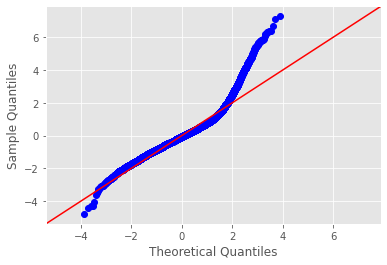

In [381]:
fig = sm.graphics.qqplot(model_3.resid, dist=stats.norm, line='45', fit=True)

## Model 4 - Transformations

In [382]:
hddf_no_out_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19414 entries, 0 to 21595
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          19414 non-null  float64
 1   bedrooms       19414 non-null  int64  
 2   bathrooms      19414 non-null  float64
 3   sqft_living    19414 non-null  int64  
 4   sqft_lot       19414 non-null  int64  
 5   floors         19414 non-null  float64
 6   age            19414 non-null  int64  
 7   waterfront     19414 non-null  float64
 8   yrsince_reno   19414 non-null  float64
 9   sqft_above     19414 non-null  int64  
 10  zipcode        19414 non-null  int64  
 11  lat            19414 non-null  float64
 12  long           19414 non-null  float64
 13  sqft_living15  19414 non-null  int64  
 14  sqft_lot15     19414 non-null  int64  
 15  cond_2         19414 non-null  uint8  
 16  cond_3         19414 non-null  uint8  
 17  cond_4         19414 non-null  uint8  
 18  cond_5

array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'sqft_living'}>],
       [<AxesSubplot:title={'center':'sqft_lot'}>,
        <AxesSubplot:title={'center':'sqft_living15'}>],
       [<AxesSubplot:title={'center':'sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

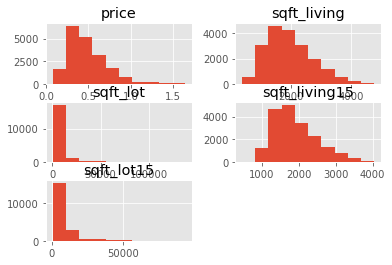

In [383]:
hddf_no_out_dum[['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']].hist()

In [384]:
hddf_no_out_dum['log_price'] = np.log(hddf_no_out_dum['price'])
hddf_no_out_dum['log_sqft_living'] = np.log(hddf_no_out_dum['sqft_living'])
hddf_no_out_dum['log_sqft_lot'] = np.log(hddf_no_out_dum['sqft_lot'])
hddf_no_out_dum['log_sqft_living15'] = np.log(hddf_no_out_dum['sqft_living15'])
hddf_no_out_dum['log_sqft_lot15'] = np.log(hddf_no_out_dum['sqft_lot15'])

array([[<AxesSubplot:title={'center':'log_price'}>,
        <AxesSubplot:title={'center':'log_sqft_living'}>],
       [<AxesSubplot:title={'center':'log_sqft_lot'}>,
        <AxesSubplot:title={'center':'log_sqft_living15'}>],
       [<AxesSubplot:title={'center':'log_sqft_lot15'}>, <AxesSubplot:>]],
      dtype=object)

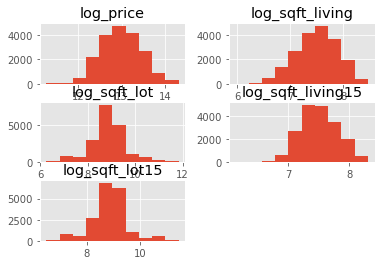

In [385]:
hddf_no_out_dum[['log_price','log_sqft_living', 'log_sqft_lot', 'log_sqft_living15', 'log_sqft_lot15']].hist()

In [386]:
hddf_log = hddf_no_out_dum.drop(columns = ['price',
                                           'sqft_living', 
                                           'sqft_lot', 
                                           'sqft_living15', 
                                           'sqft_lot15', 
                                           'sqft_above', 
                                           'grade_5'], axis = 1)

In [387]:
outcome = 'log_price'
predictors = hddf_log.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [388]:
model_4 = ols(formula = formula, data = hddf_log).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2244.
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        01:21:46   Log-Likelihood:                 250.53
No. Observations:               19414   AIC:                            -451.1
Df Residuals:                   19389   BIC:                            -254.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.6664      3.706     -0.989      0.322     -10.930       3.597
bedrooms             -0.0207      0.003     -7.640      0.000      -0.026      -0.015
bathrooms             0.0559      0.004     12.747      0.000       0.047       0.064
floors                0.0363      0.005      8.032      0.000       0.027       0.045
age                   0.0048      0.000     28.812      0.000       0.004       0.005
waterfront         5.566e-14    1.3e-14      4.289      0.000    3.02e-14    8.11e-14
yrsince_reno         -0.0010      0.000     -5.741      0.000      -0.001      -0.001
zipcode              -0.0006   4.22e-05    -14.073      0.000      -0.001      -0.001
lat                   1.4029      0.013    104.662      0.000       1.377       1.429
long                 -0.0293      0.019     -1.579      0.114      -0.066       0.007
cond_2                0.1043      0.052      2.009      0.045       0.003       0.206
cond_3                0.2075      0.048      4.297      0.000       0.113       0.302
cond_4                0.2660      0.048      5.508      0.000       0.171       0.361
cond_5                0.3233      0.049      6.655      0.000       0.228       0.418
grade_6               0.1445      0.017      8.365      0.000       0.111       0.178
grade_7               0.2814      0.017     16.425      0.000       0.248       0.315
grade_8               0.4411      0.018     24.598      0.000       0.406       0.476
grade_9               0.6439      0.019     33.610      0.000       0.606       0.681
grade_10              0.7698      0.021     36.788      0.000       0.729       0.811
grade_11              0.8721      0.029     30.112      0.000       0.815       0.929
view_1                0.1641      0.014     11.382      0.000       0.136       0.192
view_2                0.1282      0.009     14.239      0.000       0.111       0.146
log_sqft_living       0.3412      0.010     35.620      0.000       0.322       0.360
log_sqft_lot         -0.0051      0.006     -0.886      0.376      -0.016       0.006
log_sqft_living15     0.2289      0.009     24.546      0.000       0.211       0.247
log_sqft_lot15       -0.0644      0.006    -10.257      0.000      -0.077      -0.052
==============================================================================
Omnibus:                      308.800   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              605.622
Skew:                           0.032   Prob(JB):                    3.10e-132
Kurtosis:                       3.863   Cond. No.                     1.00e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smalles

**Observations**
1. log_sqft_lot no longer relevant
2. long no longer relevant
3. waterfront no longer relevnant

In [389]:
X = hddf_log.drop("log_price", axis = 1)
y = hddf_log['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [390]:
model4_linreg = LinearRegression()
model4_linreg.fit(X_train, y_train)
y_pred = model4_linreg.predict(X_test)
residuals = y_pred - y_test

In [391]:
model4_linreg.coef_

array([-2.38356433e-02,  5.94897171e-02,  3.87189760e-02,  4.96815877e-03,
        5.55111512e-17, -1.08531942e-03, -6.26854910e-04,  1.39806343e+00,
       -2.05133916e-02,  8.07216560e-02,  1.84373031e-01,  2.43326025e-01,
        3.01279482e-01,  1.38273864e-01,  2.77718780e-01,  4.32487732e-01,
        6.34760929e-01,  7.54959143e-01,  8.56224860e-01,  1.62453908e-01,
        1.27135106e-01,  3.43797209e-01, -4.58453697e-03,  2.28188945e-01,
       -6.46019459e-02])

In [392]:
mse_train = mean_squared_error(y_train, model4_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.2400775355248702
Test RMSE: 0.23537694857208655


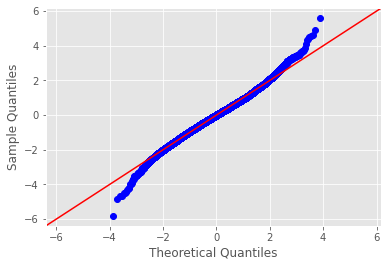

In [393]:
fig = sm.graphics.qqplot(model_4.resid, dist=stats.norm, line='45', fit=True)

**Observations**

## Model 5

1. log_sqft_lot no longer relevant
2. waterfront no longer relevnant

In [482]:
hddf_log5 = hddf_log.drop(columns = ['log_sqft_lot', 'waterfront' ], axis = 1,)
hddf_log5.reset_index(inplace=True)

In [483]:
hddf_log5.head()

,index,bedrooms,bathrooms,floors,age,yrsince_reno,zipcode,lat,long,cond_2,...,grade_8,grade_9,grade_10,grade_11,view_1,view_2,log_price,log_sqft_living,log_sqft_living15,log_sqft_lot15
0,0,3,1.00,1.0,60,60.0,98178,47.5112,-122.257,0,...,0,0,0,0,0,0,12.309982,7.073270,7.200425,8.639411
1,1,3,2.25,2.0,64,24.0,98125,47.7210,-122.319,0,...,0,0,0,0,0,0,13.195614,7.851661,7.432484,8.941022
2,2,2,1.00,1.0,82,82.0,98028,47.7379,-122.233,0,...,0,0,0,0,0,0,12.100712,6.646391,7.908387,8.994917
3,3,4,3.00,1.0,50,50.0,98136,47.5208,-122.393,0,...,0,0,0,0,0,0,13.311329,7.580700,7.215240,8.517193
4,4,3,2.00,1.0,28,28.0,98074,47.6168,-122.045,0,...,1,0,0,0,0,0,13.142166,7.426549,7.495542,8.923058


In [484]:
outcome = 'log_price'
predictors = hddf_log5.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [485]:
model_5 = ols(formula = formula, data = hddf_log5).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     2248.
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        03:35:05   Log-Likelihood:                 265.18
No. Observations:               19414   AIC:                            -480.4
Df Residuals:                   19389   BIC:                            -283.5
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -3.3920      3.683     -0.921      0.357     -10.610       3.826
index              1.565e-06   2.85e-07      5.483      0.000    1.01e-06    2.12e-06
bedrooms             -0.0207      0.003     -7.644      0.000      -0.026      -0.015
bathrooms             0.0562      0.004     12.845      0.000       0.048       0.065
floors                0.0359      0.004      8.000      0.000       0.027       0.045
age                   0.0049      0.000     29.102      0.000       0.005       0.005
yrsince_reno         -0.0010      0.000     -5.693      0.000      -0.001      -0.001
zipcode              -0.0006   4.21e-05    -14.136      0.000      -0.001      -0.001
lat                   1.4030      0.013    104.890      0.000       1.377       1.429
long                 -0.0283      0.018     -1.529      0.126      -0.065       0.008
cond_2                0.1074      0.052      2.071      0.038       0.006       0.209
cond_3                0.2117      0.048      4.390      0.000       0.117       0.306
cond_4                0.2703      0.048      5.604      0.000       0.176       0.365
cond_5                0.3274      0.048      6.752      0.000       0.232       0.423
grade_6               0.1457      0.017      8.443      0.000       0.112       0.180
grade_7               0.2839      0.017     16.575      0.000       0.250       0.317
grade_8               0.4436      0.018     24.753      0.000       0.408       0.479
grade_9               0.6460      0.019     33.747      0.000       0.609       0.684
grade_10              0.7718      0.021     36.906      0.000       0.731       0.813
grade_11              0.8751      0.029     30.231      0.000       0.818       0.932
view_1                0.1646      0.014     11.425      0.000       0.136       0.193
view_2                0.1282      0.009     14.251      0.000       0.111       0.146
log_sqft_living       0.3394      0.009     35.857      0.000       0.321       0.358
log_sqft_living15     0.2290      0.009     24.578      0.000       0.211       0.247
log_sqft_lot15       -0.0674      0.003    -20.199      0.000      -0.074      -0.061
==============================================================================
Omnibus:                      311.207   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              613.262
Skew:                           0.029   Prob(JB):                    6.79e-134
Kurtosis:                       3.869   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinear

**Observations** all features look good
need to check for multicolinearity between features

In [486]:
X = hddf_log5.drop("log_price", axis = 1)
y = hddf_log5['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [487]:
model5_linreg = LinearRegression()
model5_linreg.fit(X_train, y_train)
y_pred = model5_linreg.predict(X_test)
residuals = y_pred - y_test

In [415]:
model5_linreg.coef_

array([-2.38768002e-02,  5.96421856e-02,  3.91509356e-02,  4.96581404e-03,
       -1.09032497e-03, -6.25561097e-04,  1.39863559e+00, -2.18145413e-02,
        8.16772286e-02,  1.85786602e-01,  2.44793141e-01,  3.02868536e-01,
        1.38228261e-01,  2.77825148e-01,  4.32653068e-01,  6.35043654e-01,
        7.55023495e-01,  8.56056228e-01,  1.62458825e-01,  1.27107369e-01,
        3.42681270e-01,  2.28246886e-01, -6.88314373e-02])

In [488]:
mse_train = mean_squared_error(y_train, model5_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.239948550844846
Test RMSE: 0.2350544540321621


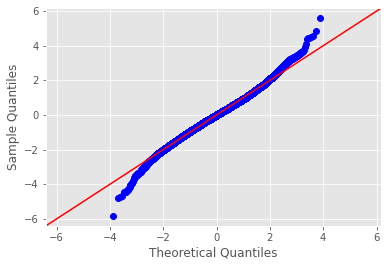

In [489]:
fig = sm.graphics.qqplot(model_5.resid, dist=stats.norm, line='45', fit=True)

In [490]:
hddf_log5.columns

Index(['index', 'bedrooms', 'bathrooms', 'floors', 'age', 'yrsince_reno',
       'zipcode', 'lat', 'long', 'cond_2', 'cond_3', 'cond_4', 'cond_5',
       'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11',
       'view_1', 'view_2', 'log_price', 'log_sqft_living', 'log_sqft_living15',
       'log_sqft_lot15'],
      dtype='object')

In [491]:
feat5 =['bedrooms', 'bathrooms', 'floors', 'age', 'yrsince_reno', 'zipcode',
       'lat', 'long', 'cond_2', 'cond_3', 'cond_4', 'cond_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'view_1',
       'view_2', 'log_price', 'log_sqft_living', 'log_sqft_living15',
       'log_sqft_lot15']

In [492]:
corr = hddf_log5[feat5].corr()
corr

,bedrooms,bathrooms,floors,age,yrsince_reno,zipcode,lat,long,cond_2,cond_3,...,grade_8,grade_9,grade_10,grade_11,view_1,view_2,log_price,log_sqft_living,log_sqft_living15,log_sqft_lot15
bedrooms,1.000000,0.490961,0.164427,-0.166247,-0.170842,-0.169266,-0.036966,0.173683,-0.045306,-0.001051,...,0.101108,0.179680,0.115193,0.052386,0.012709,0.039297,0.309645,0.636924,0.409922,0.202570
bathrooms,0.490961,1.000000,0.516613,-0.549132,-0.568044,-0.216688,0.001470,0.270483,-0.074997,0.200915,...,0.269544,0.303237,0.237521,0.110289,0.029036,0.069462,0.468042,0.728291,0.538146,0.008335
floors,0.164427,0.516613,1.000000,-0.508183,-0.515980,-0.061218,0.040225,0.143387,-0.051817,0.326207,...,0.232535,0.268724,0.166387,0.078717,-0.025116,-0.001783,0.297115,0.358090,0.266484,-0.317644
age,-0.166247,-0.549132,-0.508183,1.000000,0.933608,0.341579,0.155621,-0.427295,0.067356,-0.386827,...,-0.230982,-0.242967,-0.153144,-0.065465,0.039371,0.057343,-0.063336,-0.359001,-0.349992,0.038823
yrsince_reno,-0.170842,-0.568044,-0.515980,0.933608,1.000000,0.318610,0.145448,-0.404288,0.071293,-0.418087,...,-0.238145,-0.246721,-0.151249,-0.061756,0.034994,0.047404,-0.095798,-0.372208,-0.338908,0.047675
zipcode,-0.169266,-0.216688,-0.061218,0.341579,0.318610,1.000000,0.279781,-0.580832,0.029274,0.030496,...,-0.073809,-0.098668,-0.070749,-0.030582,0.050488,0.076588,-0.022176,-0.232014,-0.307815,-0.269912
lat,-0.036966,0.001470,0.040225,0.155621,0.145448,0.279781,1.000000,-0.133483,-0.019360,0.039580,...,0.031007,0.045684,0.052767,0.021433,0.013105,0.008515,0.507870,0.023246,0.029091,-0.124515
long,0.173683,0.270483,0.143387,-0.427295,-0.404288,-0.580832,-0.133483,1.000000,-0.033644,0.091077,...,0.055439,0.149615,0.129114,0.046941,-0.064003,-0.065478,0.078216,0.303815,0.400499,0.338760
cond_2,-0.045306,-0.074997,-0.051817,0.067356,0.071293,0.029274,-0.019360,-0.033644,1.000000,-0.118130,...,-0.039818,-0.029096,-0.014370,-0.007007,-0.005723,-0.014704,-0.086115,-0.078869,-0.054575,0.018447
cond_3,-0.001051,0.200915,0.326207,-0.386827,-0.418087,0.030496,0.039580,0.091077,-0.118130,1.000000,...,0.082304,0.117864,0.091328,0.044486,-0.022344,-0.015024,0.021135,0.099091,0.116211,-0.168396


In [421]:
#looking for pairwise correlations over .65 is a sign of multicolinearity

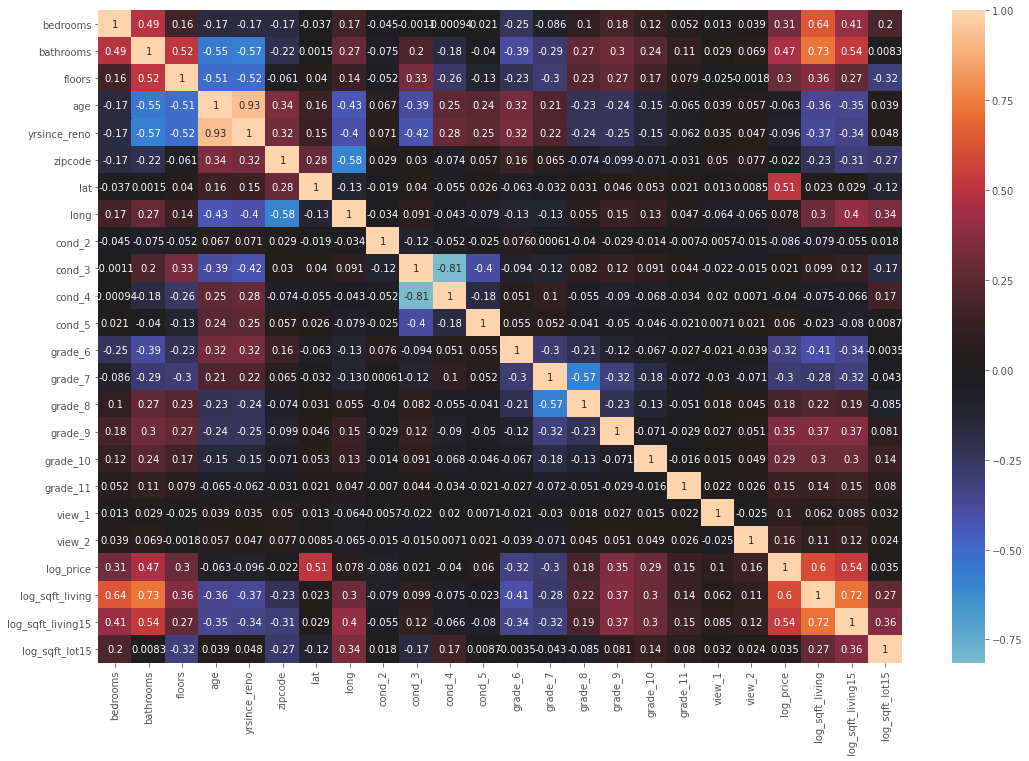

In [493]:
plt.figure(figsize=(18,12))
sns.heatmap(corr, center=0, annot=True);


Tacoma 98002
fed way 98003 270
Bellevue -98005
Riverview 98019
enumclaw 98022
Isaaquah 98027
Kent 98031
Tahoma 98038
Mercer Island -98040 204
Lake Washington-98052
snoqualmie 98065 268
vashon island 98070 46
seattle pub 98134
shoreline - 98155 424
highline 98166 217
tukwila 98168 264


98001-98199

In [494]:
hddf_log5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              19414 non-null  int64  
 1   bedrooms           19414 non-null  int64  
 2   bathrooms          19414 non-null  float64
 3   floors             19414 non-null  float64
 4   age                19414 non-null  int64  
 5   yrsince_reno       19414 non-null  float64
 6   zipcode            19414 non-null  int64  
 7   lat                19414 non-null  float64
 8   long               19414 non-null  float64
 9   cond_2             19414 non-null  uint8  
 10  cond_3             19414 non-null  uint8  
 11  cond_4             19414 non-null  uint8  
 12  cond_5             19414 non-null  uint8  
 13  grade_6            19414 non-null  uint8  
 14  grade_7            19414 non-null  uint8  
 15  grade_8            19414 non-null  uint8  
 16  grade_9            194

In [495]:
len(sorted(hddf_log5['zipcode'].unique()))

70

In [496]:
hddf_log5['zipcode'].min()

98001

In [460]:
!pip install haversine

In [497]:
import haversine as hs

In [498]:
seattle=(47.60970,-122.31941)
loc2=(47.4870,-122.320)
hs.haversine(seattle,loc2)

13.643708203335784

In [499]:
hddf_log5['lat_long'] = tuple(zip(hddf_log5['lat'],hddf_log5['long']))

In [500]:
hddf_log5['lat_long'].tail()

19409    (47.5537, -122.398)
19410    (47.5773, -122.409)
19411    (47.6993, -122.346)
19412    (47.5107, -122.362)
19413    (47.5345, -122.069)
Name: lat_long, dtype: object

In [501]:
distance = []
for i in hddf_log5.lat_long:
    distance.append(hs.haversine(seattle,i,unit='mi'))

In [502]:
hddf_log5['distance'] = pd.Series(distance)

In [503]:
hddf_log5['distance']

0         7.401683
1         7.690121
2         9.727371
3         7.035601
4        12.790889
           ...    
19409     5.327934
19410     4.736869
19411     6.313250
19412     7.122660
19413    12.776945
Name: distance, Length: 19414, dtype: float64

In [474]:
hddf_log5['lat_long']

0        (47.5112, -122.257)
1         (47.721, -122.319)
2        (47.7379, -122.233)
3        (47.5208, -122.393)
4        (47.6168, -122.045)
                ...         
21590    (47.5537, -122.398)
21591    (47.5773, -122.409)
21592    (47.6993, -122.346)
21593    (47.5107, -122.362)
21595    (47.5345, -122.069)
Name: lat_long, Length: 19414, dtype: object

## Model 6 Distance 

In [506]:
hddf_log6 = hddf_log5.drop(columns = ['lat_long', 'lat','long','index' ], axis = 1,)


In [507]:
hddf_log6.head()

,bedrooms,bathrooms,floors,age,yrsince_reno,zipcode,cond_2,cond_3,cond_4,cond_5,...,grade_9,grade_10,grade_11,view_1,view_2,log_price,log_sqft_living,log_sqft_living15,log_sqft_lot15,distance
0,3,1.00,1.0,60,60.0,98178,0,1,0,0,...,0,0,0,0,0,12.309982,7.073270,7.200425,8.639411,7.401683
1,3,2.25,2.0,64,24.0,98125,0,1,0,0,...,0,0,0,0,0,13.195614,7.851661,7.432484,8.941022,7.690121
2,2,1.00,1.0,82,82.0,98028,0,1,0,0,...,0,0,0,0,0,12.100712,6.646391,7.908387,8.994917,9.727371
3,4,3.00,1.0,50,50.0,98136,0,0,0,1,...,0,0,0,0,0,13.311329,7.580700,7.215240,8.517193,7.035601
4,3,2.00,1.0,28,28.0,98074,0,1,0,0,...,0,0,0,0,0,13.142166,7.426549,7.495542,8.923058,12.790889


In [508]:
outcome = 'log_price'
predictors = hddf_log6.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [509]:
model_6 = ols(formula = formula, data = hddf_log6).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     2349.
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        03:43:08   Log-Likelihood:                -41.417
No. Observations:               19414   AIC:                             128.8
Df Residuals:                   19391   BIC:                             309.9
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           128.0913      3.989     32.112      0.000     120.273     135.910
bedrooms             -0.0343      0.003    -12.482      0.000      -0.040      -0.029
bathrooms             0.0427      0.004      9.593      0.000       0.034       0.051
floors                0.0489      0.005     10.759      0.000       0.040       0.058
age                   0.0030      0.000     17.680      0.000       0.003       0.003
yrsince_reno         -0.0011      0.000     -6.121      0.000      -0.001      -0.001
zipcode              -0.0012   4.06e-05    -30.259      0.000      -0.001      -0.001
cond_2                0.0867      0.053      1.646      0.100      -0.017       0.190
cond_3                0.2514      0.049      5.132      0.000       0.155       0.347
cond_4                0.2904      0.049      5.927      0.000       0.194       0.386
cond_5                0.3573      0.049      7.253      0.000       0.261       0.454
grade_6               0.1269      0.018      7.243      0.000       0.093       0.161
grade_7               0.2700      0.017     15.565      0.000       0.236       0.304
grade_8               0.4057      0.018     22.343      0.000       0.370       0.441
grade_9               0.5703      0.019     29.321      0.000       0.532       0.608
grade_10              0.6757      0.021     31.745      0.000       0.634       0.717
grade_11              0.7406      0.029     25.157      0.000       0.683       0.798
view_1                0.0865      0.015      5.921      0.000       0.058       0.115
view_2                0.0858      0.009      9.421      0.000       0.068       0.104
log_sqft_living       0.3683      0.010     38.288      0.000       0.349       0.387
log_sqft_living15     0.2705      0.009     28.962      0.000       0.252       0.289
log_sqft_lot15        0.0206      0.003      5.906      0.000       0.014       0.027
distance             -0.0385      0.000   -100.683      0.000      -0.039      -0.038
==============================================================================
Omnibus:                      301.994   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              426.037
Skew:                          -0.193   Prob(JB):                     3.07e-93
Kurtosis:                       3.614   Cond. No.                     2.25e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.25e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [510]:
X = hddf_log6.drop("log_price", axis = 1)
y = hddf_log6['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [511]:
model6_linreg = LinearRegression()
model6_linreg.fit(X_train, y_train)
y_pred = model6_linreg.predict(X_test)
residuals = y_pred - y_test

In [512]:
model6_linreg.coef_

array([-0.03605253,  0.04418483,  0.05234835,  0.00320866, -0.00120591,
       -0.00124664,  0.05449815,  0.22165655,  0.26223642,  0.33004265,
        0.12080637,  0.26507092,  0.39946484,  0.56111789,  0.66580047,
        0.73291589,  0.08168506,  0.0875189 ,  0.37306373,  0.27046575,
        0.01923503, -0.03826686])

In [513]:
mse_train = mean_squared_error(y_train, model6_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.24383952283673785
Test RMSE: 0.2385198727635198


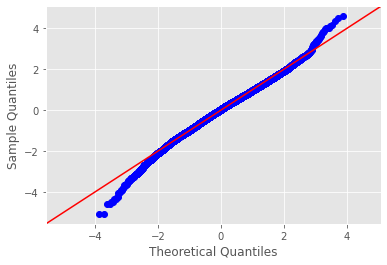

In [514]:
fig = sm.graphics.qqplot(model_6.resid, dist=stats.norm, line='45', fit=True)

**Observation** R2 Model a bit less after adding distance.  

## Model 7 zipcode dummies

In [515]:
zipcode_dummies = pd.get_dummies(hddf_log6['zipcode'], prefix = 'zip', drop_first= True)

In [516]:
hddf_log7 = pd.concat([hddf_log6,zipcode_dummies], axis =1 )


In [525]:
hddf_log7 = hddf_log7.drop(columns = ['zipcode', 'floors', 'zip_98002',
                                      'zip_98003', 'zip_98042', 'zip_98058',
                                      'zip_98092', 'zip_98106','zip_98166' ], axis = 1,)

In [527]:
hddf_log7.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 83 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           19414 non-null  int64  
 1   bathrooms          19414 non-null  float64
 2   age                19414 non-null  int64  
 3   yrsince_reno       19414 non-null  float64
 4   cond_2             19414 non-null  uint8  
 5   cond_3             19414 non-null  uint8  
 6   cond_4             19414 non-null  uint8  
 7   cond_5             19414 non-null  uint8  
 8   grade_6            19414 non-null  uint8  
 9   grade_7            19414 non-null  uint8  
 10  grade_8            19414 non-null  uint8  
 11  grade_9            19414 non-null  uint8  
 12  grade_10           19414 non-null  uint8  
 13  grade_11           19414 non-null  uint8  
 14  view_1             19414 non-null  uint8  
 15  view_2             19414 non-null  uint8  
 16  log_price          194

In [528]:
outcome = 'log_price'
predictors = hddf_log7.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [529]:
model_7 = ols(formula = formula, data = hddf_log7).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1477.
Date:                Fri, 28 May 2021   Prob (F-statistic):               0.00
Time:                        04:06:19   Log-Likelihood:                 6600.1
No. Observations:               19414   AIC:                        -1.303e+04
Df Residuals:                   19331   BIC:                        -1.238e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.9560      0.063    126.893      0.000       7.833       8.079
bedrooms             -0.0073      0.002     -3.671      0.000      -0.011      -0.003
bathrooms             0.0285      0.003      9.005      0.000       0.022       0.035
age                   0.0015      0.000     11.997      0.000       0.001       0.002
yrsince_reno         -0.0011      0.000     -8.889      0.000      -0.001      -0.001
cond_2                0.1310      0.038      3.487      0.000       0.057       0.205
cond_3                0.2553      0.035      7.308      0.000       0.187       0.324
cond_4                0.2907      0.035      8.316      0.000       0.222       0.359
cond_5                0.3525      0.035     10.028      0.000       0.284       0.421
grade_6               0.0828      0.013      6.585      0.000       0.058       0.107
grade_7               0.1490      0.013     11.888      0.000       0.124       0.174
grade_8               0.2379      0.013     18.019      0.000       0.212       0.264
grade_9               0.3676      0.014     25.941      0.000       0.340       0.395
grade_10              0.4371      0.016     28.122      0.000       0.407       0.468
grade_11              0.5469      0.021     25.718      0.000       0.505       0.589
view_1                0.0991      0.011      9.435      0.000       0.079       0.120
view_2                0.1027      0.007     15.609      0.000       0.090       0.116
log_sqft_living       0.3888      0.007     56.448      0.000       0.375       0.402
log_sqft_living15     0.1583      0.007     22.790      0.000       0.145       0.172
log_sqft_lot15        0.0476      0.003     17.423      0.000       0.042       0.053
distance             -0.0232      0.001    -41.712      0.000      -0.024      -0.022
zip_98004             0.7041      0.014     51.163      0.000       0.677       0.731
zip_98005             0.4026      0.016     25.465      0.000       0.372       0.434
zip_98006             0.3313      0.011     30.956      0.000       0.310       0.352
zip_98007             0.3415      0.016     21.347      0.000       0.310       0.373
zip_98008             0.3602      0.012     29.982      0.000       0.337       0.384
zip_98010             0.2875      0.020     14.250      0.000       0.248       0.327
zip_98011             0.2123      0.013     15.805      0.000       0.186       0.239
zip_98014             0.3151      0.021     14.835      0.000       0.273       0.357
zip_98019             0.2617      0.014     18.633      0.000       0.234       0.289
zip_98022             0.2631      0.016     16.360      0.000       0.232       0.295
zip_98023            -0.0451      0.009     -5.086      0.000      -0.062      -0.028
zip_98024             0.3753      0.026     14.673      0.000       0.325

In [530]:
X = hddf_log7.drop("log_price", axis = 1)
y = hddf_log7['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [531]:
model7_linreg = LinearRegression()
model7_linreg.fit(X_train, y_train)
y_pred = model7_linreg.predict(X_test)
residuals = y_pred - y_test

In [532]:
model7_linreg.coef_

array([-0.00977159,  0.03121166,  0.00166331, -0.00122457,  0.10886212,
        0.23347732,  0.26780727,  0.33115541,  0.08549183,  0.15314329,
        0.24068812,  0.36982845,  0.43337944,  0.55735471,  0.09086766,
        0.09966221,  0.39198578,  0.15474959,  0.04712295, -0.02282794,
        0.72675221,  0.40027644,  0.33369963,  0.33905674,  0.35906463,
        0.28353184,  0.20285165,  0.27679254,  0.25991553,  0.25065848,
       -0.04695123,  0.39025594,  0.35167638,  0.15960259,  0.45751673,
       -0.04885823, -0.07179328, -0.16292335,  0.45808034,  0.24518262,
        0.16128824,  0.83268873,  0.49942138,  0.42783175,  0.3829557 ,
        0.45826778, -0.08427359,  0.05098182,  0.10589422,  0.43506753,
        0.18135769,  0.29721364,  0.35435495,  0.40217413,  0.29702247,
        0.50696443,  0.44892708,  0.53127228,  0.45924138, -0.041016  ,
        0.54401364,  0.55221451,  0.44693241,  0.35930738,  0.4601981 ,
        0.08116338,  0.52564406,  0.33567076,  0.23273623,  0.18

In [533]:
mse_train = mean_squared_error(y_train, model7_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.17320362692288985
Test RMSE: 0.1698828885700905


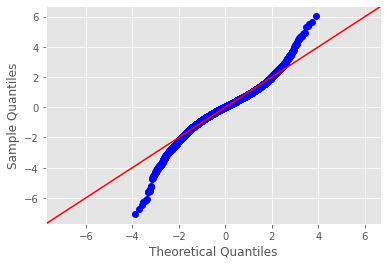

In [534]:
fig = sm.graphics.qqplot(model_7.resid, dist=stats.norm, line='45', fit=True)

**Observation** model 86% variance explained all features relevant

question  why grade and condition in model? is view helpful?
reducing cat var no more than continous
bin condition?  <3 
bin grade >8 


In [ ]:
hddf_no_out.reset_index(inplace=True)

#hddf_no_out
want to go bck and create feature where grade is 8+ and remove condition

In [576]:

bins = [1,5.99,7.99,13]
hddf_no_out['bin_grade'] = pd.cut(hddf_no_out['grade'],bins)

In [577]:
hddf_no_out['bin_grade'].value_counts()

(5.99, 7.99]    10512
(7.99, 13.0]     8683
(1.0, 5.99]       219
Name: bin_grade, dtype: int64

In [578]:
hddf_no_out[hddf_no_out['grade']>=8]

,level_0,index,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,age,...,yrsince_reno,sqft_above,sqft_basement,view,zipcode,lat,long,sqft_living15,sqft_lot15,bin_grade
4,4,4,1954400510,510000.0,3,2.00,1680,8080,1.0,28,...,28.0,1680,0.0,0.0,98074,47.6168,-122.045,1800,7503,"(7.99, 13.0]"
18,18,22,7137970340,285000.0,5,2.50,2270,6300,2.0,20,...,20.0,2270,0.0,0.0,98092,47.3266,-122.169,2240,7005,"(7.99, 13.0]"
20,20,24,3814700200,329000.0,3,2.25,2450,6500,2.0,30,...,30.0,2450,0.0,0.0,98030,47.3739,-122.172,2200,6865,"(7.99, 13.0]"
22,22,26,1794500383,937000.0,3,1.75,2450,2691,2.0,100,...,100.0,1750,700.0,0.0,98119,47.6386,-122.360,1760,3573,"(7.99, 13.0]"
23,23,27,3303700376,667000.0,3,1.00,1400,1581,1.5,106,...,106.0,1400,0.0,0.0,98112,47.6221,-122.314,1860,3861,"(7.99, 13.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19409,19409,21590,7936000429,1010000.0,4,3.50,3510,7200,2.0,6,...,6.0,2600,910.0,0.0,98136,47.5537,-122.398,2050,6200,"(7.99, 13.0]"
19410,19410,21591,2997800021,475000.0,3,2.50,1310,1294,2.0,7,...,7.0,1180,130.0,0.0,98116,47.5773,-122.409,1330,1265,"(7.99, 13.0]"
19411,19411,21592,263000018,360000.0,3,2.50,1530,1131,3.0,6,...,6.0,1530,0.0,0.0,98103,47.6993,-122.346,1530,1509,"(7.99, 13.0]"
19412,19412,21593,6600060120,400000.0,4,2.50,2310,5813,2.0,1,...,1.0,2310,0.0,0.0,98146,47.5107,-122.362,1830,7200,"(7.99, 13.0]"


In [589]:
hddf_8 = hddf_log7

In [590]:
hddf_8['bin_grade'] = hddf_no_out['bin_grade']

In [591]:
hddf_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 84 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   bedrooms           19414 non-null  int64   
 1   bathrooms          19414 non-null  float64 
 2   age                19414 non-null  int64   
 3   yrsince_reno       19414 non-null  float64 
 4   cond_2             19414 non-null  uint8   
 5   cond_3             19414 non-null  uint8   
 6   cond_4             19414 non-null  uint8   
 7   cond_5             19414 non-null  uint8   
 8   grade_6            19414 non-null  uint8   
 9   grade_7            19414 non-null  uint8   
 10  grade_8            19414 non-null  uint8   
 11  grade_9            19414 non-null  uint8   
 12  grade_10           19414 non-null  uint8   
 13  grade_11           19414 non-null  uint8   
 14  view_1             19414 non-null  uint8   
 15  view_2             19414 non-null  uint8   
 16  log_

In [593]:
hddf_8.drop(columns = ['grade_6', 'grade_7', 'grade_8','grade_9', 'grade_10', 'grade_11'], axis = 1,inplace=True)

In [595]:
hddf_8.drop(columns = ['cond_2', 'cond_3', 'cond_4','cond_5'], axis = 1,inplace=True)

In [596]:
hddf_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   bedrooms           19414 non-null  int64   
 1   bathrooms          19414 non-null  float64 
 2   age                19414 non-null  int64   
 3   yrsince_reno       19414 non-null  float64 
 4   view_1             19414 non-null  uint8   
 5   view_2             19414 non-null  uint8   
 6   log_price          19414 non-null  float64 
 7   log_sqft_living    19414 non-null  float64 
 8   log_sqft_living15  19414 non-null  float64 
 9   log_sqft_lot15     19414 non-null  float64 
 10  distance           19414 non-null  float64 
 11  zip_98004          19414 non-null  uint8   
 12  zip_98005          19414 non-null  uint8   
 13  zip_98006          19414 non-null  uint8   
 14  zip_98007          19414 non-null  uint8   
 15  zip_98008          19414 non-null  uint8   
 16  zip_

In [597]:
grade_dummies = pd.get_dummies(hddf_8['bin_grade'], prefix = 'grade', drop_first= True)

In [599]:
hddf_8 = pd.concat([hddf_8,grade_dummies], axis =1 )

In [600]:
hddf_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 76 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   bedrooms            19414 non-null  int64   
 1   bathrooms           19414 non-null  float64 
 2   age                 19414 non-null  int64   
 3   yrsince_reno        19414 non-null  float64 
 4   view_1              19414 non-null  uint8   
 5   view_2              19414 non-null  uint8   
 6   log_price           19414 non-null  float64 
 7   log_sqft_living     19414 non-null  float64 
 8   log_sqft_living15   19414 non-null  float64 
 9   log_sqft_lot15      19414 non-null  float64 
 10  distance            19414 non-null  float64 
 11  zip_98004           19414 non-null  uint8   
 12  zip_98005           19414 non-null  uint8   
 13  zip_98006           19414 non-null  uint8   
 14  zip_98007           19414 non-null  uint8   
 15  zip_98008           19414 non-null  

In [601]:
hddf_8 = pd.concat([hddf_8,hddf_no_out['zipcode']], axis =1 )

In [602]:
hddf_8

,bedrooms,bathrooms,age,yrsince_reno,view_1,view_2,log_price,log_sqft_living,log_sqft_living15,log_sqft_lot15,...,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,bin_grade,"grade_(5.99, 7.99]","grade_(7.99, 13.0]",zipcode
0,3,1.00,60,60.0,0,0,12.309982,7.073270,7.200425,8.639411,...,0,0,1,0,0,0,"(5.99, 7.99]",1,0,98178
1,3,2.25,64,24.0,0,0,13.195614,7.851661,7.432484,8.941022,...,0,0,0,0,0,0,"(5.99, 7.99]",1,0,98125
2,2,1.00,82,82.0,0,0,12.100712,6.646391,7.908387,8.994917,...,0,0,0,0,0,0,"(5.99, 7.99]",1,0,98028
3,4,3.00,50,50.0,0,0,13.311329,7.580700,7.215240,8.517193,...,0,0,0,0,0,0,"(5.99, 7.99]",1,0,98136
4,3,2.00,28,28.0,0,0,13.142166,7.426549,7.495542,8.923058,...,0,0,0,0,0,0,"(7.99, 13.0]",0,1,98074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19409,4,3.50,6,6.0,0,0,13.825461,8.163371,7.625595,8.732305,...,0,0,0,0,0,0,"(7.99, 13.0]",0,1,98136
19410,3,2.50,7,7.0,0,0,13.071070,7.177782,7.192934,7.142827,...,0,0,0,0,0,0,"(7.99, 13.0]",0,1,98116
19411,3,2.50,6,6.0,0,0,12.793859,7.333023,7.333023,7.319202,...,0,0,0,0,0,0,"(7.99, 13.0]",0,1,98103
19412,4,2.50,1,1.0,0,0,12.899220,7.745003,7.512071,8.881836,...,0,0,0,0,0,0,"(7.99, 13.0]",0,1,98146


In [608]:
sorted(hddf_8.zipcode.unique())

[98001,
 98002,
 98003,
 98004,
 98005,
 98006,
 98007,
 98008,
 98010,
 98011,
 98014,
 98019,
 98022,
 98023,
 98024,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98033,
 98034,
 98038,
 98039,
 98040,
 98042,
 98045,
 98052,
 98053,
 98055,
 98056,
 98058,
 98059,
 98065,
 98070,
 98072,
 98074,
 98075,
 98077,
 98092,
 98102,
 98103,
 98105,
 98106,
 98107,
 98108,
 98109,
 98112,
 98115,
 98116,
 98117,
 98118,
 98119,
 98122,
 98125,
 98126,
 98133,
 98136,
 98144,
 98146,
 98148,
 98155,
 98166,
 98168,
 98177,
 98178,
 98188,
 98198,
 98199]

In [690]:
nerural_1 = [98019, 98014, 98024, 98065, 98027,  98029, 98075, 98077, 98053, 98074, ]
serural_2 = [98045, 98022, 98051, 98010, 98092, 98042, 98058, 98059, 98038,]
fedway_3 = [98002, 98030, 98031, 98032, 98198, 98001,  98003, 98047, 98023,  ]
vi_4 = [98070,]
renton_5 = [98146,98166,98168,98057,98178,98056,98055,98158,98148,98055,98138, 98188]
mercer_6 = [98040,]
bellvue_7 = [98004, 98005, 98006, 98007, 98008, 98039,]
redmond_8 = [98011, 98028, 98033, 98034, 98052, 98072]
nseattle_9 = [98177, 98155, 98133, 98125, 98115, 98117, 98107, 98199, 98119, 98103, 98102, 98112, 98109, 98105,]
dtseattle_10 = [98122, 98144, 98134, 98106, 98136, 98116, 98126, 98108, 98118, 98164, 98121 ]

In [691]:
districts = []
for i in hddf_8['zipcode']:
    if i in nerural_1:
        districts.append('anerural_1')
    elif i in serural_2:
        districts.append('serural_2')
    elif i in fedway_3:
        districts.append('fedway_3')
    elif i in vi_4:
        districts.append('vi_4')
    elif i in renton_5:
        districts.append('renton_5')
    elif i in mercer_6:
        districts.append('mercer_6')
    elif i in bellvue_7:
        districts.append('bellvue_7')
    elif i in redmond_8:
        districts.append('redmond_8')
    elif i in nseattle_9:
        districts.append('nseattle_9')
    elif i in dtseattle_10:
        districts.append('dtseattle_10')    

In [692]:
districts

['renton_5',
 'nseattle_9',
 'redmond_8',
 'dtseattle_10',
 'anerural_1',
 'fedway_3',
 'fedway_3',
 'renton_5',
 'serural_2',
 'nseattle_9',
 'redmond_8',
 'anerural_1',
 'nseattle_9',
 'anerural_1',
 'nseattle_9',
 'fedway_3',
 'fedway_3',
 'nseattle_9',
 'serural_2',
 'fedway_3',
 'fedway_3',
 'fedway_3',
 'nseattle_9',
 'nseattle_9',
 'nseattle_9',
 'redmond_8',
 'anerural_1',
 'nseattle_9',
 'nseattle_9',
 'nseattle_9',
 'serural_2',
 'nseattle_9',
 'redmond_8',
 'nseattle_9',
 'fedway_3',
 'renton_5',
 'anerural_1',
 'anerural_1',
 'nseattle_9',
 'serural_2',
 'anerural_1',
 'fedway_3',
 'bellvue_7',
 'nseattle_9',
 'renton_5',
 'renton_5',
 'nseattle_9',
 'nseattle_9',
 'nseattle_9',
 'nseattle_9',
 'serural_2',
 'serural_2',
 'serural_2',
 'renton_5',
 'renton_5',
 'nseattle_9',
 'dtseattle_10',
 'dtseattle_10',
 'bellvue_7',
 'fedway_3',
 'serural_2',
 'bellvue_7',
 'redmond_8',
 'nseattle_9',
 'serural_2',
 'serural_2',
 'anerural_1',
 'bellvue_7',
 'dtseattle_10',
 'nseattle

In [693]:
hddf_8['dist'] = pd.Series(districts)

In [627]:
hddf_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 78 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   bedrooms            19414 non-null  int64   
 1   bathrooms           19414 non-null  float64 
 2   age                 19414 non-null  int64   
 3   yrsince_reno        19414 non-null  float64 
 4   view_1              19414 non-null  uint8   
 5   view_2              19414 non-null  uint8   
 6   log_price           19414 non-null  float64 
 7   log_sqft_living     19414 non-null  float64 
 8   log_sqft_living15   19414 non-null  float64 
 9   log_sqft_lot15      19414 non-null  float64 
 10  distance            19414 non-null  float64 
 11  zip_98004           19414 non-null  uint8   
 12  zip_98005           19414 non-null  uint8   
 13  zip_98006           19414 non-null  uint8   
 14  zip_98007           19414 non-null  uint8   
 15  zip_98008           19414 non-null  

In [694]:
hddf_8.columns

Index(['bedrooms', 'bathrooms', 'age', 'yrsince_reno', 'view_1', 'view_2',
       'log_price', 'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot15',
       'distance', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98168', 'zip_98177

In [758]:
hddf_8.drop(columns=['d_bellvue_7', 'd_dtseattle_10', 'd_fedway_3', 'd_mercer_6',
       'd_nseattle_9', 'd_redmond_8', 'd_renton_5', 'd_serural_2', 'd_vi_4'], inplace=True)

In [759]:
dist_dummies = pd.get_dummies(hddf_8['dist'], prefix = 'd', drop_first= False)

In [760]:
dist_dummies

,d_anerural_1,d_bellvue_7,d_dtseattle_10,d_fedway_3,d_mercer_6,d_nseattle_9,d_redmond_8,d_renton_5,d_serural_2,d_vi_4
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
19409,0,0,1,0,0,0,0,0,0,0
19410,0,0,1,0,0,0,0,0,0,0
19411,0,0,0,0,0,1,0,0,0,0
19412,0,0,0,0,0,0,0,1,0,0


In [761]:
hddf_8 = pd.concat([hddf_8,dist_dummies], axis =1 )

In [762]:
hddf_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19414 entries, 0 to 19413
Data columns (total 88 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   bedrooms            19414 non-null  int64   
 1   bathrooms           19414 non-null  float64 
 2   age                 19414 non-null  int64   
 3   yrsince_reno        19414 non-null  float64 
 4   view_1              19414 non-null  uint8   
 5   view_2              19414 non-null  uint8   
 6   log_price           19414 non-null  float64 
 7   log_sqft_living     19414 non-null  float64 
 8   log_sqft_living15   19414 non-null  float64 
 9   log_sqft_lot15      19414 non-null  float64 
 10  distance            19414 non-null  float64 
 11  zip_98004           19414 non-null  uint8   
 12  zip_98005           19414 non-null  uint8   
 13  zip_98006           19414 non-null  uint8   
 14  zip_98007           19414 non-null  uint8   
 15  zip_98008           19414 non-null  

In [763]:
hddf_8.columns

Index(['bedrooms', 'bathrooms', 'age', 'yrsince_reno', 'view_1', 'view_2',
       'log_price', 'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot15',
       'distance', 'zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98168', 'zip_98177

In [764]:
hddf_8_dist = hddf_8.drop(columns = ['zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98168', 'zip_98177', 'zip_98178',
       'zip_98188', 'zip_98198', 'zip_98199', 'bin_grade', 'zipcode', 'dist', ], axis = 1,)

In [767]:
hddf_8_dist.columns

Index(['bedrooms', 'bathrooms', 'age', 'yrsince_reno', 'view_1', 'view_2',
       'log_price', 'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot15',
       'distance', 'grade_(5.99, 7.99]', 'grade_(7.99, 13.0]', 'd_anerural_1',
       'd_bellvue_7', 'd_dtseattle_10', 'd_fedway_3', 'd_mercer_6',
       'd_nseattle_9', 'd_redmond_8', 'd_renton_5', 'd_serural_2', 'd_vi_4'],
      dtype='object')

In [783]:
#rename GradeCatColumns
hddf_8_ex.rename(columns={"grade_(5.99, 7.99]": "grade_6_8", "grade_(7.99, 13.0]": "grade_8_13"}, inplace=True)


In [785]:
hddf_8_ex.columns

Index(['bedrooms', 'bathrooms', 'age', 'yrsince_reno', 'view_1', 'view_2',
       'log_price', 'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot15',
       'distance', 'grade_6_8', 'grade_8_13', 'zipcode', 'dist',
       'd_anerural_1', 'd_bellvue_7', 'd_dtseattle_10', 'd_fedway_3',
       'd_mercer_6', 'd_nseattle_9', 'd_redmond_8', 'd_renton_5',
       'd_serural_2', 'd_vi_4', 'lat', 'long'],
      dtype='object')

In [786]:
hddf_8_ex = hddf_8.drop(columns = ['zip_98004', 'zip_98005', 'zip_98006', 'zip_98007',
       'zip_98008', 'zip_98010', 'zip_98011', 'zip_98014', 'zip_98019',
       'zip_98022', 'zip_98023', 'zip_98024', 'zip_98027', 'zip_98028',
       'zip_98029', 'zip_98030', 'zip_98031', 'zip_98032', 'zip_98033',
       'zip_98034', 'zip_98038', 'zip_98039', 'zip_98040', 'zip_98045',
       'zip_98052', 'zip_98053', 'zip_98055', 'zip_98056', 'zip_98059',
       'zip_98065', 'zip_98070', 'zip_98072', 'zip_98074', 'zip_98075',
       'zip_98077', 'zip_98102', 'zip_98103', 'zip_98105', 'zip_98107',
       'zip_98108', 'zip_98109', 'zip_98112', 'zip_98115', 'zip_98116',
       'zip_98117', 'zip_98118', 'zip_98119', 'zip_98122', 'zip_98125',
       'zip_98126', 'zip_98133', 'zip_98136', 'zip_98144', 'zip_98146',
       'zip_98148', 'zip_98155', 'zip_98168', 'zip_98177', 'zip_98178',
       'zip_98188', 'zip_98198', 'zip_98199', 'bin_grade', ], axis = 1,)

In [787]:
hddf_8_ex['lat'] = hddf_no_out['lat']

In [788]:
hddf_8_ex['long'] = hddf_no_out['long']

In [789]:
hddf_8_ex.columns

Index(['bedrooms', 'bathrooms', 'age', 'yrsince_reno', 'view_1', 'view_2',
       'log_price', 'log_sqft_living', 'log_sqft_living15', 'log_sqft_lot15',
       'distance', 'grade_(5.99, 7.99]', 'grade_(7.99, 13.0]', 'zipcode',
       'dist', 'd_anerural_1', 'd_bellvue_7', 'd_dtseattle_10', 'd_fedway_3',
       'd_mercer_6', 'd_nseattle_9', 'd_redmond_8', 'd_renton_5',
       'd_serural_2', 'd_vi_4', 'lat', 'long'],
      dtype='object')

<AxesSubplot:xlabel='long', ylabel='lat'>

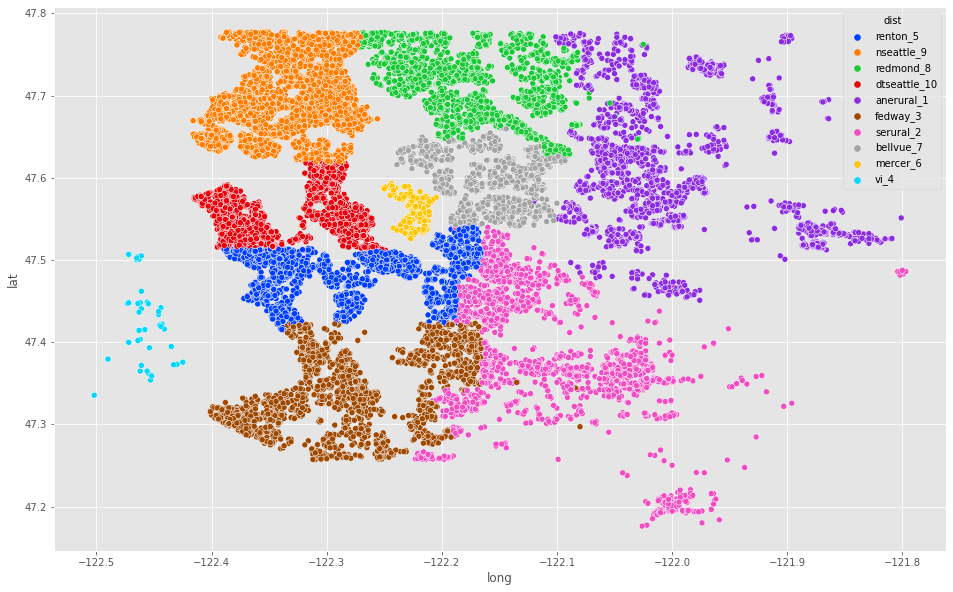

In [790]:
plt.figure(figsize=(16,10))
sns.scatterplot(x='long', y='lat', data=hddf_8_ex, hue='dist', palette='bright')

In [791]:
hddf_8_ex['dist'].value_counts()

nseattle_9      4492
serural_2       2488
dtseattle_10    2433
anerural_1      2416
fedway_3        2187
redmond_8       2177
renton_5        1815
bellvue_7       1156
mercer_6         204
vi_4              46
Name: dist, dtype: int64

<AxesSubplot:xlabel='dist', ylabel='log_price'>

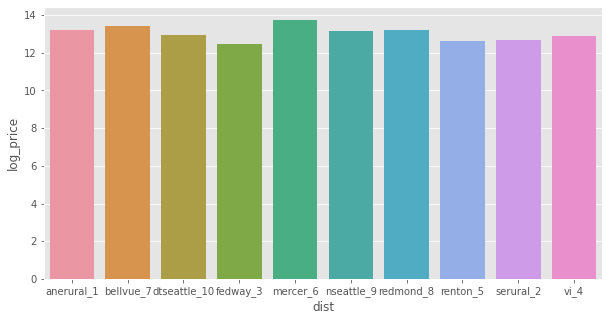

In [792]:
plt.figure(figsize=(10,5))
sns.barplot(x = "dist", y = "log_price", data = hddf_8_ex.groupby(by="dist", sort=True).mean().reset_index())

## Model 8 Districts and Grade Category

In [793]:
outcome = 'log_price'
predictors = hddf_8_dist.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [794]:
model_8 = ols(formula = formula, data = hddf_8_dist).fit()
model_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     3585.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        03:10:11   Log-Likelihood:                 2742.8
No. Observations:               19414   AIC:                            -5442.
Df Residuals:                   19392   BIC:                            -5268.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.0753      0.052    135.232      0.000       6.973       7.178
bedrooms             -0.0267      0.002    -11.181      0.000      -0.031      -0.022
bathrooms             0.0504      0.004     13.266      0.000       0.043       0.058
age                   0.0023      0.000     15.829      0.000       0.002       0.003
yrsince_reno         -0.0011      0.000     -7.195      0.000      -0.001      -0.001
view_1                0.1206      0.013      9.519      0.000       0.096       0.145
view_2                0.1225      0.008     15.484      0.000       0.107       0.138
log_sqft_living       0.4626      0.008     57.394      0.000       0.447       0.478
log_sqft_living15     0.2282      0.008     28.142      0.000       0.212       0.244
log_sqft_lot15        0.0120      0.003      4.068      0.000       0.006       0.018
distance             -0.0281      0.001    -52.576      0.000      -0.029      -0.027
grade_6_8             0.1030      0.015      6.971      0.000       0.074       0.132
grade_8_13            0.2318      0.016     14.910      0.000       0.201       0.262
d_anerural_1          0.8848      0.008    104.472      0.000       0.868       0.901
d_bellvue_7           0.8950      0.009    101.622      0.000       0.878       0.912
d_dtseattle_10        0.5853      0.007     80.397      0.000       0.571       0.600
d_fedway_3            0.4707      0.009     55.158      0.000       0.454       0.487
d_mercer_6            0.9761      0.015     63.560      0.000       0.946       1.006
d_nseattle_9          0.8075      0.007    120.201      0.000       0.794       0.821
d_redmond_8           0.7820      0.008    101.659      0.000       0.767       0.797
d_renton_5            0.3864      0.007     53.078      0.000       0.372       0.401
d_serural_2           0.6006      0.009     69.087      0.000       0.584       0.618
d_vi_4                0.6867      0.029     23.684      0.000       0.630       0.744
==============================================================================
Omnibus:                      707.599   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1684.667
Skew:                          -0.199   Prob(JB):                         0.00
Kurtosis:                       4.387   Cond. No.                     2.10e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.48e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [795]:
X = hddf_8_dist.drop("log_price", axis = 1)
y = hddf_8_dist['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [796]:
model8_linreg = LinearRegression()
model8_linreg.fit(X_train, y_train)
y_pred = model8_linreg.predict(X_test)
residuals = y_pred - y_test

In [797]:
model8_linreg.coef_

array([-0.02939862,  0.05416358,  0.00251116, -0.00117319,  0.10965396,
        0.12120392,  0.46549578,  0.22629986,  0.0122434 , -0.02785581,
        0.10498602,  0.23173568,  0.17724354,  0.19188431, -0.12395026,
       -0.23770117,  0.26681152,  0.09895999,  0.07638276, -0.32379235,
       -0.10639042, -0.01944792])

In [798]:
mse_train = mean_squared_error(y_train, model8_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.21155575895554005
Test RMSE: 0.20576788539801008


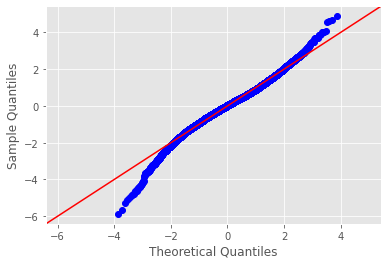

In [799]:
fig = sm.graphics.qqplot(model_8.resid, dist=stats.norm, line='45', fit=True)

**Observations:**  district MercerIsland6 no longer relevant 
age last renovated coefficient almost insignificant
Lets look at one last model with those features removed.

## Model 9 minus  fedway3 district removed

In [808]:
hddf_9 = hddf_8_dist.drop(columns = ['d_fedway_3', ], axis = 1)

In [809]:
outcome = 'log_price'
predictors = hddf_9.drop(columns = ['log_price'], axis = 1)
predictor_variables = "+".join(predictors.columns)
formula = outcome + '~' + predictor_variables

In [810]:
model_9 = ols(formula = formula, data = hddf_9).fit()
model_9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     3585.
Date:                Sat, 29 May 2021   Prob (F-statistic):               0.00
Time:                        03:14:49   Log-Likelihood:                 2742.8
No. Observations:               19414   AIC:                            -5442.
Df Residuals:                   19392   BIC:                            -5268.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.5460      0.058    130.401      0.000       7.433       7.659
bedrooms             -0.0267      0.002    -11.181      0.000      -0.031      -0.022
bathrooms             0.0504      0.004     13.266      0.000       0.043       0.058
age                   0.0023      0.000     15.829      0.000       0.002       0.003
yrsince_reno         -0.0011      0.000     -7.195      0.000      -0.001      -0.001
view_1                0.1206      0.013      9.519      0.000       0.096       0.145
view_2                0.1225      0.008     15.484      0.000       0.107       0.138
log_sqft_living       0.4626      0.008     57.394      0.000       0.447       0.478
log_sqft_living15     0.2282      0.008     28.142      0.000       0.212       0.244
log_sqft_lot15        0.0120      0.003      4.068      0.000       0.006       0.018
distance             -0.0281      0.001    -52.576      0.000      -0.029      -0.027
grade_6_8             0.1030      0.015      6.971      0.000       0.074       0.132
grade_8_13            0.2318      0.016     14.910      0.000       0.201       0.262
d_anerural_1          0.4141      0.007     61.817      0.000       0.401       0.427
d_bellvue_7           0.4243      0.010     44.131      0.000       0.405       0.443
d_dtseattle_10        0.1146      0.010     11.548      0.000       0.095       0.134
d_mercer_6            0.5054      0.017     29.702      0.000       0.472       0.539
d_nseattle_9          0.3368      0.009     38.693      0.000       0.320       0.354
d_redmond_8           0.3113      0.008     39.476      0.000       0.296       0.327
d_renton_5           -0.0843      0.008    -10.117      0.000      -0.101      -0.068
d_serural_2           0.1299      0.006     20.872      0.000       0.118       0.142
d_vi_4                0.2160      0.032      6.820      0.000       0.154       0.278
==============================================================================
Omnibus:                      707.599   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1684.667
Skew:                          -0.199   Prob(JB):                         0.00
Kurtosis:                       4.387   Cond. No.                     2.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [811]:
X = hddf_9.drop("log_price", axis = 1)
y = hddf_9['log_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

In [812]:
model9_linreg = LinearRegression()
model9_linreg.fit(X_train, y_train)
y_pred = model9_linreg.predict(X_test)
residuals = y_pred - y_test

In [813]:
model9_linreg.coef_

array([-0.02939862,  0.05416358,  0.00251116, -0.00117319,  0.10965396,
        0.12120392,  0.46549578,  0.22629986,  0.0122434 , -0.02785581,
        0.10498602,  0.23173568,  0.41494472,  0.42958548,  0.11375091,
        0.5045127 ,  0.33666116,  0.31408393, -0.08609118,  0.13131075,
        0.21825326])

In [814]:
mse_train = mean_squared_error(y_train, model9_linreg.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.21155575895554005
Test RMSE: 0.20576788539801008


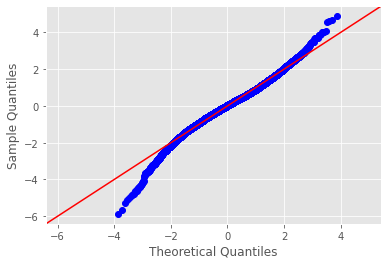

In [815]:
fig = sm.graphics.qqplot(model_9.resid, dist=stats.norm, line='45', fit=True)

TODO Bedrooms interaction ...inverse log